## EPL Hyperparameter Tuning

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

In [2]:
train=pd.read_csv("datasets/epl_data_train_onehot.csv")
test=pd.read_csv("datasets/epl_data_test_onehot.csv")
# print(train.head())
# print(train.shape)

In [3]:
X_train = train.drop(columns = ['FTR'])
y_train = train['FTR']
print(X_train.shape)
print(y_train.shape)

(2660, 29)
(2660,)


In [4]:
X_test = test.drop(columns = ['FTR'])
y_test = test['FTR']
print(X_test.shape)
print(y_test.shape)

(380, 29)
(380,)


In [5]:
columns = X_train.shape[1]
columns

29

In [6]:
# 41-75-3
# We first need to define the sequence of dependencies (the computational graph)
# x = Input(shape=(20,32))
def fit_model(learning_rate, hidden_layer, dropout, batch_size):
    x = Input(shape=(columns,))
    # h = Conv2D(32, (7, 7), strides=(2, 2))(x)
    # h = Activation('relu')(x)
    h = Flatten()(x)
    for i in hidden_layer:
        h = Dense(i, activation = 'relu')(h)
    # for i in range(10):
    #     h = Dense(75)(h)
    h = Dropout(dropout)(h)
    p = Activation('softmax')(h)

    # Now that we have defined how to find p from x, we can create a 
    # model simply by saying what is input and what is output
    model = Model(inputs=x, outputs=p)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
    model.summary()
    
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=200, validation_split=0.04)
    return history,model

In [7]:
#hyperparam tuning
#learning_rate
# learning_rates = [1e-5,1e-6,1e-7]
learning_rates = [1e-5,1e-6]
#hidden_layers
# hidden_layers = [[41,75],[41,10],[41,10,10,10]]
hidden_layers = [[41,75],[41,10,10,10]]
#dropout
dropouts = [0,.3,.5,.7]
# dropouts = [.3,.5]
#batch_size
# batch_sizes = [8,16,32,64]
batch_sizes = [16,32]
#result
result = {}
best_history = None
best_val_accuracy = 0
best_model = None

for lr in learning_rates:
    for hl in hidden_layers:
        hl_str = '-'.join(map(str, hl))+'-3'
        for dp in dropouts:
            for bs in batch_sizes:
                history, model = fit_model(lr, hl, dp, bs)
                tmp = {}
                tmp['loss'] = history.history['loss'][-1]
                tmp['accuracy'] = history.history['accuracy'][-1]
                tmp['val_loss'] = history.history['val_loss'][-1]
                tmp['val_accuracy'] = history.history['val_accuracy'][-1]
    #             print(history)
                result[(lr,hl_str,dp, bs)] = tmp
                print(tmp['val_accuracy'], tmp)
                if tmp['val_accuracy'] > best_val_accuracy:
                    best_val_accuracy = tmp['val_accuracy']
                    best_history = history
                    best_model = model
                
                
            

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
flatten (Flatten)            (None, 29)                0         
_________________________________________________________________
dense (Dense)                (None, 41)                1230      
_________________________________________________________________
dense_1 (Dense)              (None, 75)                3150      
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
activation (Activation)      (None, 75)                0         
Total params: 4,380
Trainable params: 4,380
Non-trainable params: 0
___________________________________________________________

160/160 [==============================] - 1s 4ms/step - loss: 1.7424 - accuracy: 0.4884 - val_loss: 1.6677 - val_accuracy: 0.4766
Epoch 50/200
160/160 [==============================] - 0s 2ms/step - loss: 1.7151 - accuracy: 0.4884 - val_loss: 1.6412 - val_accuracy: 0.4766
Epoch 51/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6889 - accuracy: 0.4861 - val_loss: 1.6161 - val_accuracy: 0.4766
Epoch 52/200
160/160 [==============================] - 1s 4ms/step - loss: 1.6637 - accuracy: 0.4865 - val_loss: 1.5917 - val_accuracy: 0.4766
Epoch 53/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6392 - accuracy: 0.4869 - val_loss: 1.5680 - val_accuracy: 0.4766
Epoch 54/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6157 - accuracy: 0.4869 - val_loss: 1.5455 - val_accuracy: 0.4766
Epoch 55/200
160/160 [==============================] - 0s 3ms/step - loss: 1.5930 - accuracy: 0.4869 - val_loss: 1.5237 - val_accuracy: 0.4766
Epoch

Epoch 106/200
160/160 [==============================] - 0s 2ms/step - loss: 1.1044 - accuracy: 0.4916 - val_loss: 1.0676 - val_accuracy: 0.5047
Epoch 107/200
160/160 [==============================] - 0s 2ms/step - loss: 1.1018 - accuracy: 0.4928 - val_loss: 1.0651 - val_accuracy: 0.5140
Epoch 108/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0994 - accuracy: 0.4924 - val_loss: 1.0624 - val_accuracy: 0.5140
Epoch 109/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0971 - accuracy: 0.4935 - val_loss: 1.0599 - val_accuracy: 0.5140
Epoch 110/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0948 - accuracy: 0.4935 - val_loss: 1.0574 - val_accuracy: 0.5140
Epoch 111/200
160/160 [==============================] - 0s 3ms/step - loss: 1.0926 - accuracy: 0.4943 - val_loss: 1.0552 - val_accuracy: 0.5140
Epoch 112/200
160/160 [==============================] - 0s 3ms/step - loss: 1.0905 - accuracy: 0.4928 - val_loss: 1.0526 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 1.0350 - accuracy: 0.5002 - val_loss: 0.9891 - val_accuracy: 0.5234
Epoch 163/200
160/160 [==============================] - 1s 3ms/step - loss: 1.0343 - accuracy: 0.5010 - val_loss: 0.9884 - val_accuracy: 0.5234
Epoch 164/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0337 - accuracy: 0.5010 - val_loss: 0.9876 - val_accuracy: 0.5234
Epoch 165/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0332 - accuracy: 0.5006 - val_loss: 0.9869 - val_accuracy: 0.5234
Epoch 166/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0327 - accuracy: 0.5002 - val_loss: 0.9862 - val_accuracy: 0.5234
Epoch 167/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0321 - accuracy: 0.5010 - val_loss: 0.9855 - val_accuracy: 0.5234
Epoch 168/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0316 - accuracy: 0.5006 - val_loss: 0.9850 - val_accuracy: 0.5234

80/80 [==============================] - 0s 2ms/step - loss: 4.3662 - accuracy: 0.0043 - val_loss: 4.4778 - val_accuracy: 0.0000e+00
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 4.3311 - accuracy: 0.0051 - val_loss: 4.4434 - val_accuracy: 0.0000e+00
Epoch 11/200
80/80 [==============================] - 0s 3ms/step - loss: 4.2963 - accuracy: 0.0082 - val_loss: 4.4089 - val_accuracy: 0.0093
Epoch 12/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2619 - accuracy: 0.0125 - val_loss: 4.3749 - val_accuracy: 0.0093
Epoch 13/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2276 - accuracy: 0.0168 - val_loss: 4.3415 - val_accuracy: 0.0093
Epoch 14/200
80/80 [==============================] - 0s 2ms/step - loss: 4.1936 - accuracy: 0.0212 - val_loss: 4.3078 - val_accuracy: 0.0187
Epoch 15/200
80/80 [==============================] - 0s 2ms/step - loss: 4.1596 - accuracy: 0.0262 - val_loss: 4.2746 - val_accuracy: 0.0187
Epoch 16/20

Epoch 67/200
80/80 [==============================] - 0s 3ms/step - loss: 1.9981 - accuracy: 0.4144 - val_loss: 2.0229 - val_accuracy: 0.3925
Epoch 68/200
80/80 [==============================] - 0s 3ms/step - loss: 1.9710 - accuracy: 0.4179 - val_loss: 1.9946 - val_accuracy: 0.3832
Epoch 69/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9447 - accuracy: 0.4203 - val_loss: 1.9673 - val_accuracy: 0.3925
Epoch 70/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9191 - accuracy: 0.4269 - val_loss: 1.9409 - val_accuracy: 0.3925
Epoch 71/200
80/80 [==============================] - 0s 2ms/step - loss: 1.8944 - accuracy: 0.4293 - val_loss: 1.9155 - val_accuracy: 0.3925
Epoch 72/200
80/80 [==============================] - 0s 2ms/step - loss: 1.8705 - accuracy: 0.4320 - val_loss: 1.8908 - val_accuracy: 0.3925
Epoch 73/200
80/80 [==============================] - 0s 2ms/step - loss: 1.8473 - accuracy: 0.4367 - val_loss: 1.8669 - val_accuracy: 0.3925
Epoch 

80/80 [==============================] - 0s 3ms/step - loss: 1.2646 - accuracy: 0.4657 - val_loss: 1.2708 - val_accuracy: 0.4579
Epoch 125/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2596 - accuracy: 0.4665 - val_loss: 1.2655 - val_accuracy: 0.4579
Epoch 126/200
80/80 [==============================] - 0s 3ms/step - loss: 1.2548 - accuracy: 0.4665 - val_loss: 1.2604 - val_accuracy: 0.4579
Epoch 127/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2500 - accuracy: 0.4677 - val_loss: 1.2555 - val_accuracy: 0.4579
Epoch 128/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2453 - accuracy: 0.4681 - val_loss: 1.2506 - val_accuracy: 0.4579
Epoch 129/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2409 - accuracy: 0.4693 - val_loss: 1.2459 - val_accuracy: 0.4579
Epoch 130/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2364 - accuracy: 0.4693 - val_loss: 1.2414 - val_accuracy: 0.4579
Epoch 131/200

80/80 [==============================] - 0s 2ms/step - loss: 1.1066 - accuracy: 0.4826 - val_loss: 1.1013 - val_accuracy: 0.4579
Epoch 182/200
80/80 [==============================] - 0s 2ms/step - loss: 1.1051 - accuracy: 0.4834 - val_loss: 1.0997 - val_accuracy: 0.4579
Epoch 183/200
80/80 [==============================] - 0s 2ms/step - loss: 1.1038 - accuracy: 0.4826 - val_loss: 1.0982 - val_accuracy: 0.4579
Epoch 184/200
80/80 [==============================] - 0s 2ms/step - loss: 1.1024 - accuracy: 0.4834 - val_loss: 1.0964 - val_accuracy: 0.4579
Epoch 185/200
80/80 [==============================] - 0s 2ms/step - loss: 1.1011 - accuracy: 0.4837 - val_loss: 1.0950 - val_accuracy: 0.4579
Epoch 186/200
80/80 [==============================] - 0s 2ms/step - loss: 1.0997 - accuracy: 0.4830 - val_loss: 1.0934 - val_accuracy: 0.4673
Epoch 187/200
80/80 [==============================] - 0s 2ms/step - loss: 1.0984 - accuracy: 0.4826 - val_loss: 1.0918 - val_accuracy: 0.4673
Epoch 188/200

160/160 [==============================] - 0s 2ms/step - loss: 3.5277 - accuracy: 0.3063 - val_loss: 3.2211 - val_accuracy: 0.4860
Epoch 30/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5029 - accuracy: 0.3177 - val_loss: 3.1829 - val_accuracy: 0.5140
Epoch 31/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4715 - accuracy: 0.3333 - val_loss: 3.1448 - val_accuracy: 0.5140
Epoch 32/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4785 - accuracy: 0.3302 - val_loss: 3.1115 - val_accuracy: 0.5047
Epoch 33/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3879 - accuracy: 0.3568 - val_loss: 3.0741 - val_accuracy: 0.5047
Epoch 34/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3769 - accuracy: 0.3494 - val_loss: 3.0408 - val_accuracy: 0.5140
Epoch 35/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3154 - accuracy: 0.3690 - val_loss: 3.0065 - val_accuracy: 0.5327
Epoch

Epoch 86/200
160/160 [==============================] - 0s 2ms/step - loss: 2.6445 - accuracy: 0.4324 - val_loss: 2.2263 - val_accuracy: 0.5421
Epoch 87/200
160/160 [==============================] - 0s 2ms/step - loss: 2.5895 - accuracy: 0.4332 - val_loss: 2.2056 - val_accuracy: 0.5421
Epoch 88/200
160/160 [==============================] - 0s 2ms/step - loss: 2.6326 - accuracy: 0.4168 - val_loss: 2.1864 - val_accuracy: 0.5421
Epoch 89/200
160/160 [==============================] - 0s 2ms/step - loss: 2.6134 - accuracy: 0.4230 - val_loss: 2.1674 - val_accuracy: 0.5421
Epoch 90/200
160/160 [==============================] - 0s 2ms/step - loss: 2.5074 - accuracy: 0.4324 - val_loss: 2.1465 - val_accuracy: 0.5421
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 2.5550 - accuracy: 0.4332 - val_loss: 2.1278 - val_accuracy: 0.5421
Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 2.5368 - accuracy: 0.4250 - val_loss: 2.1084 - val_accuracy:

160/160 [==============================] - 0s 2ms/step - loss: 2.4011 - accuracy: 0.4125 - val_loss: 1.7152 - val_accuracy: 0.5514
Epoch 143/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3600 - accuracy: 0.4305 - val_loss: 1.7120 - val_accuracy: 0.5514
Epoch 144/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3722 - accuracy: 0.4238 - val_loss: 1.7089 - val_accuracy: 0.5514
Epoch 145/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3362 - accuracy: 0.4230 - val_loss: 1.7059 - val_accuracy: 0.5514
Epoch 146/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3965 - accuracy: 0.4164 - val_loss: 1.7060 - val_accuracy: 0.5514
Epoch 147/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4298 - accuracy: 0.4175 - val_loss: 1.7058 - val_accuracy: 0.5514
Epoch 148/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3662 - accuracy: 0.4344 - val_loss: 1.7041 - val_accuracy: 0.5514

160/160 [==============================] - 0s 2ms/step - loss: 2.2637 - accuracy: 0.4418 - val_loss: 1.6538 - val_accuracy: 0.5421
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3844 - accuracy: 0.4140 - val_loss: 1.6554 - val_accuracy: 0.5421
Epoch 200/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3008 - accuracy: 0.4383 - val_loss: 1.6536 - val_accuracy: 0.5421
0.5420560836791992 {'loss': 2.300823450088501, 'accuracy': 0.43830788135528564, 'val_loss': 1.6535708904266357, 'val_accuracy': 0.5420560836791992}
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 29)                0         
_________________________________________________________________
dense_6 (Dense)   

Epoch 47/200
80/80 [==============================] - 0s 3ms/step - loss: 2.8498 - accuracy: 0.3858 - val_loss: 2.5688 - val_accuracy: 0.4486
Epoch 48/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8219 - accuracy: 0.3815 - val_loss: 2.5426 - val_accuracy: 0.4579
Epoch 49/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8039 - accuracy: 0.3897 - val_loss: 2.5168 - val_accuracy: 0.4486
Epoch 50/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8057 - accuracy: 0.3866 - val_loss: 2.4923 - val_accuracy: 0.4393
Epoch 51/200
80/80 [==============================] - 0s 3ms/step - loss: 2.7756 - accuracy: 0.3843 - val_loss: 2.4684 - val_accuracy: 0.4486
Epoch 52/200
80/80 [==============================] - 0s 2ms/step - loss: 2.7340 - accuracy: 0.3909 - val_loss: 2.4445 - val_accuracy: 0.4486
Epoch 53/200
80/80 [==============================] - 0s 2ms/step - loss: 2.7366 - accuracy: 0.3964 - val_loss: 2.4210 - val_accuracy: 0.4579
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 2.4373 - accuracy: 0.4226 - val_loss: 1.8686 - val_accuracy: 0.4953
Epoch 105/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4070 - accuracy: 0.4097 - val_loss: 1.8646 - val_accuracy: 0.4860
Epoch 106/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4534 - accuracy: 0.4187 - val_loss: 1.8625 - val_accuracy: 0.4860
Epoch 107/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4693 - accuracy: 0.4093 - val_loss: 1.8611 - val_accuracy: 0.4860
Epoch 108/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4262 - accuracy: 0.4164 - val_loss: 1.8581 - val_accuracy: 0.4860
Epoch 109/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4919 - accuracy: 0.3980 - val_loss: 1.8580 - val_accuracy: 0.4860
Epoch 110/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5197 - accuracy: 0.3976 - val_loss: 1.8586 - val_accuracy: 0.4860
Epoch 111/200

80/80 [==============================] - 0s 2ms/step - loss: 2.4111 - accuracy: 0.4203 - val_loss: 1.7964 - val_accuracy: 0.5327
Epoch 162/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4375 - accuracy: 0.4191 - val_loss: 1.7970 - val_accuracy: 0.5327
Epoch 163/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3985 - accuracy: 0.4136 - val_loss: 1.7958 - val_accuracy: 0.5327
Epoch 164/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3515 - accuracy: 0.4340 - val_loss: 1.7937 - val_accuracy: 0.5327
Epoch 165/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2975 - accuracy: 0.4438 - val_loss: 1.7904 - val_accuracy: 0.5327
Epoch 166/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3650 - accuracy: 0.4273 - val_loss: 1.7876 - val_accuracy: 0.5327
Epoch 167/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4119 - accuracy: 0.4179 - val_loss: 1.7877 - val_accuracy: 0.5327
Epoch 168/200

160/160 [==============================] - 0s 2ms/step - loss: 4.3519 - accuracy: 0.0678 - val_loss: 4.0206 - val_accuracy: 0.1495
Epoch 10/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2621 - accuracy: 0.0952 - val_loss: 3.9596 - val_accuracy: 0.1869
Epoch 11/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2193 - accuracy: 0.1097 - val_loss: 3.9001 - val_accuracy: 0.2150
Epoch 12/200
160/160 [==============================] - 0s 2ms/step - loss: 4.1426 - accuracy: 0.1269 - val_loss: 3.8410 - val_accuracy: 0.2336
Epoch 13/200
160/160 [==============================] - 0s 2ms/step - loss: 4.0941 - accuracy: 0.1434 - val_loss: 3.7840 - val_accuracy: 0.2710
Epoch 14/200
160/160 [==============================] - 0s 2ms/step - loss: 4.0212 - accuracy: 0.1657 - val_loss: 3.7270 - val_accuracy: 0.2804
Epoch 15/200
160/160 [==============================] - 0s 2ms/step - loss: 3.9612 - accuracy: 0.1720 - val_loss: 3.6745 - val_accuracy: 0.2991
Epoch

Epoch 66/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3638 - accuracy: 0.3220 - val_loss: 2.8810 - val_accuracy: 0.5794
Epoch 67/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4135 - accuracy: 0.3212 - val_loss: 2.8827 - val_accuracy: 0.5794
Epoch 68/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3851 - accuracy: 0.3184 - val_loss: 2.8839 - val_accuracy: 0.5794
Epoch 69/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3563 - accuracy: 0.3263 - val_loss: 2.8813 - val_accuracy: 0.5794
Epoch 70/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4063 - accuracy: 0.3188 - val_loss: 2.8819 - val_accuracy: 0.5794
Epoch 71/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3345 - accuracy: 0.3392 - val_loss: 2.8812 - val_accuracy: 0.5794
Epoch 72/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3575 - accuracy: 0.3322 - val_loss: 2.8802 - val_accuracy:

Epoch 123/200
160/160 [==============================] - 0s 2ms/step - loss: 3.2759 - accuracy: 0.3796 - val_loss: 2.8448 - val_accuracy: 0.6168
Epoch 124/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3320 - accuracy: 0.3803 - val_loss: 2.8448 - val_accuracy: 0.6168
Epoch 125/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3303 - accuracy: 0.3729 - val_loss: 2.8465 - val_accuracy: 0.6168
Epoch 126/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3975 - accuracy: 0.3498 - val_loss: 2.8496 - val_accuracy: 0.6168
Epoch 127/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3250 - accuracy: 0.3796 - val_loss: 2.8486 - val_accuracy: 0.6168
Epoch 128/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3027 - accuracy: 0.3831 - val_loss: 2.8456 - val_accuracy: 0.6168
Epoch 129/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3750 - accuracy: 0.3596 - val_loss: 2.8491 - val_ac

160/160 [==============================] - 0s 3ms/step - loss: 3.2960 - accuracy: 0.3835 - val_loss: 2.8319 - val_accuracy: 0.6168
Epoch 180/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3032 - accuracy: 0.3815 - val_loss: 2.8324 - val_accuracy: 0.6168
Epoch 181/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3615 - accuracy: 0.3662 - val_loss: 2.8325 - val_accuracy: 0.6168
Epoch 182/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3416 - accuracy: 0.3768 - val_loss: 2.8307 - val_accuracy: 0.6168
Epoch 183/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3031 - accuracy: 0.3862 - val_loss: 2.8291 - val_accuracy: 0.6168
Epoch 184/200
160/160 [==============================] - 0s 2ms/step - loss: 3.2863 - accuracy: 0.3811 - val_loss: 2.8277 - val_accuracy: 0.6168
Epoch 185/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3380 - accuracy: 0.3772 - val_loss: 2.8272 - val_accuracy: 0.6168

Epoch 27/200
80/80 [==============================] - 0s 2ms/step - loss: 4.1083 - accuracy: 0.1355 - val_loss: 3.4455 - val_accuracy: 0.1869
Epoch 28/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0751 - accuracy: 0.1375 - val_loss: 3.4147 - val_accuracy: 0.2336
Epoch 29/200
80/80 [==============================] - 0s 2ms/step - loss: 3.9909 - accuracy: 0.1673 - val_loss: 3.3832 - val_accuracy: 0.2710
Epoch 30/200
80/80 [==============================] - 0s 2ms/step - loss: 3.9671 - accuracy: 0.1653 - val_loss: 3.3539 - val_accuracy: 0.2991
Epoch 31/200
80/80 [==============================] - 0s 2ms/step - loss: 3.9264 - accuracy: 0.1700 - val_loss: 3.3255 - val_accuracy: 0.3178
Epoch 32/200
80/80 [==============================] - 0s 2ms/step - loss: 3.9117 - accuracy: 0.1802 - val_loss: 3.2987 - val_accuracy: 0.3458
Epoch 33/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8609 - accuracy: 0.1951 - val_loss: 3.2718 - val_accuracy: 0.3645
Epoch 

Epoch 85/200
80/80 [==============================] - 0s 2ms/step - loss: 3.2296 - accuracy: 0.3251 - val_loss: 2.5802 - val_accuracy: 0.5327
Epoch 86/200
80/80 [==============================] - 0s 2ms/step - loss: 3.1676 - accuracy: 0.3369 - val_loss: 2.5738 - val_accuracy: 0.5421
Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 3.1715 - accuracy: 0.3396 - val_loss: 2.5677 - val_accuracy: 0.5421
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 3.2198 - accuracy: 0.3247 - val_loss: 2.5618 - val_accuracy: 0.5514
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 3.1935 - accuracy: 0.3404 - val_loss: 2.5573 - val_accuracy: 0.5327
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 3.2323 - accuracy: 0.3325 - val_loss: 2.5520 - val_accuracy: 0.5421
Epoch 91/200
80/80 [==============================] - 0s 3ms/step - loss: 3.1682 - accuracy: 0.3341 - val_loss: 2.5453 - val_accuracy: 0.5421
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 3.0809 - accuracy: 0.3329 - val_loss: 2.4109 - val_accuracy: 0.5327
Epoch 143/200
80/80 [==============================] - 0s 3ms/step - loss: 3.0807 - accuracy: 0.3412 - val_loss: 2.4115 - val_accuracy: 0.5234
Epoch 144/200
80/80 [==============================] - 0s 2ms/step - loss: 3.0723 - accuracy: 0.3392 - val_loss: 2.4117 - val_accuracy: 0.5234
Epoch 145/200
80/80 [==============================] - 0s 2ms/step - loss: 3.0232 - accuracy: 0.3557 - val_loss: 2.4094 - val_accuracy: 0.5234
Epoch 146/200
80/80 [==============================] - 0s 2ms/step - loss: 3.0342 - accuracy: 0.3600 - val_loss: 2.4080 - val_accuracy: 0.5234
Epoch 147/200
80/80 [==============================] - 0s 2ms/step - loss: 3.0574 - accuracy: 0.3478 - val_loss: 2.4064 - val_accuracy: 0.5234
Epoch 148/200
80/80 [==============================] - 0s 2ms/step - loss: 2.9894 - accuracy: 0.3596 - val_loss: 2.4053 - val_accuracy: 0.5234
Epoch 149/200

80/80 [==============================] - 0s 2ms/step - loss: 3.0469 - accuracy: 0.3631 - val_loss: 2.3833 - val_accuracy: 0.5421
Epoch 200/200
80/80 [==============================] - 0s 2ms/step - loss: 2.9490 - accuracy: 0.3768 - val_loss: 2.3832 - val_accuracy: 0.5421
0.5420560836791992 {'loss': 2.948958158493042, 'accuracy': 0.37681159377098083, 'val_loss': 2.3832387924194336, 'val_accuracy': 0.5420560836791992}
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 29)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 41)                1230      
_________________________________________________________________
dense_13 (Dense)             (None,

160/160 [==============================] - 0s 2ms/step - loss: 3.8690 - accuracy: 0.2064 - val_loss: 3.4057 - val_accuracy: 0.4486
Epoch 47/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8812 - accuracy: 0.2029 - val_loss: 3.4060 - val_accuracy: 0.4486
Epoch 48/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8214 - accuracy: 0.2056 - val_loss: 3.4021 - val_accuracy: 0.4486
Epoch 49/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8038 - accuracy: 0.2170 - val_loss: 3.3975 - val_accuracy: 0.4486
Epoch 50/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8713 - accuracy: 0.1951 - val_loss: 3.3974 - val_accuracy: 0.4579
Epoch 51/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8408 - accuracy: 0.2119 - val_loss: 3.3974 - val_accuracy: 0.4579
Epoch 52/200
160/160 [==============================] - 0s 2ms/step - loss: 3.7877 - accuracy: 0.2209 - val_loss: 3.3944 - val_accuracy: 0.4579
Epoch

160/160 [==============================] - 0s 2ms/step - loss: 3.6484 - accuracy: 0.3036 - val_loss: 3.2449 - val_accuracy: 0.4673
Epoch 103/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6334 - accuracy: 0.3083 - val_loss: 3.2454 - val_accuracy: 0.4673
Epoch 104/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6282 - accuracy: 0.3079 - val_loss: 3.2469 - val_accuracy: 0.4673
Epoch 105/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6505 - accuracy: 0.3087 - val_loss: 3.2470 - val_accuracy: 0.4673
Epoch 106/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5592 - accuracy: 0.3224 - val_loss: 3.2407 - val_accuracy: 0.4673
Epoch 107/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6049 - accuracy: 0.3184 - val_loss: 3.2407 - val_accuracy: 0.4673
Epoch 108/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5871 - accuracy: 0.3306 - val_loss: 3.2365 - val_accuracy: 0.4673

160/160 [==============================] - 0s 2ms/step - loss: 3.5340 - accuracy: 0.3388 - val_loss: 3.2072 - val_accuracy: 0.4953
Epoch 159/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6007 - accuracy: 0.3177 - val_loss: 3.2083 - val_accuracy: 0.5047
Epoch 160/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6176 - accuracy: 0.3318 - val_loss: 3.2087 - val_accuracy: 0.5047
Epoch 161/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5885 - accuracy: 0.3306 - val_loss: 3.2097 - val_accuracy: 0.5047
Epoch 162/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5784 - accuracy: 0.3353 - val_loss: 3.2073 - val_accuracy: 0.5047
Epoch 163/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5668 - accuracy: 0.3388 - val_loss: 3.2061 - val_accuracy: 0.5047
Epoch 164/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6032 - accuracy: 0.3318 - val_loss: 3.2067 - val_accuracy: 0.5047

80/80 [==============================] - 0s 2ms/step - loss: 6.8799 - accuracy: 3.9170e-04 - val_loss: 4.8284 - val_accuracy: 0.0000e+00
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 6.7234 - accuracy: 7.8339e-04 - val_loss: 4.8001 - val_accuracy: 0.0000e+00
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 6.6848 - accuracy: 0.0016 - val_loss: 4.7732 - val_accuracy: 0.0000e+00
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 6.5769 - accuracy: 7.8339e-04 - val_loss: 4.7475 - val_accuracy: 0.0000e+00
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 6.5022 - accuracy: 0.0020 - val_loss: 4.7223 - val_accuracy: 0.0000e+00
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 6.3637 - accuracy: 0.0020 - val_loss: 4.6973 - val_accuracy: 0.0000e+00
Epoch 11/200
80/80 [==============================] - 0s 2ms/step - loss: 6.2809 - accuracy: 0.0031 - val_loss: 4.6727 - val_accu

80/80 [==============================] - 0s 2ms/step - loss: 4.0301 - accuracy: 0.1610 - val_loss: 3.7732 - val_accuracy: 0.2804
Epoch 63/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0423 - accuracy: 0.1516 - val_loss: 3.7560 - val_accuracy: 0.2897
Epoch 64/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0087 - accuracy: 0.1633 - val_loss: 3.7390 - val_accuracy: 0.3178
Epoch 65/200
80/80 [==============================] - 0s 2ms/step - loss: 3.9868 - accuracy: 0.1637 - val_loss: 3.7211 - val_accuracy: 0.3364
Epoch 66/200
80/80 [==============================] - 0s 2ms/step - loss: 3.9926 - accuracy: 0.1641 - val_loss: 3.7054 - val_accuracy: 0.3364
Epoch 67/200
80/80 [==============================] - 0s 2ms/step - loss: 3.9570 - accuracy: 0.1720 - val_loss: 3.6917 - val_accuracy: 0.3178
Epoch 68/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0102 - accuracy: 0.1602 - val_loss: 3.6796 - val_accuracy: 0.3551
Epoch 69/200
80/80 

80/80 [==============================] - 0s 2ms/step - loss: 3.7056 - accuracy: 0.2495 - val_loss: 3.4393 - val_accuracy: 0.4953
Epoch 120/200
80/80 [==============================] - 0s 3ms/step - loss: 3.7729 - accuracy: 0.2452 - val_loss: 3.4395 - val_accuracy: 0.4953
Epoch 121/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8241 - accuracy: 0.2362 - val_loss: 3.4409 - val_accuracy: 0.4953
Epoch 122/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8031 - accuracy: 0.2288 - val_loss: 3.4430 - val_accuracy: 0.4953
Epoch 123/200
80/80 [==============================] - 0s 2ms/step - loss: 3.7546 - accuracy: 0.2503 - val_loss: 3.4389 - val_accuracy: 0.4953
Epoch 124/200
80/80 [==============================] - 0s 3ms/step - loss: 3.7656 - accuracy: 0.2452 - val_loss: 3.4383 - val_accuracy: 0.5047
Epoch 125/200
80/80 [==============================] - 0s 3ms/step - loss: 3.7672 - accuracy: 0.2421 - val_loss: 3.4383 - val_accuracy: 0.4953
Epoch 126/200

80/80 [==============================] - 0s 2ms/step - loss: 3.6603 - accuracy: 0.3271 - val_loss: 3.3966 - val_accuracy: 0.5047
Epoch 177/200
80/80 [==============================] - 0s 2ms/step - loss: 3.7175 - accuracy: 0.3126 - val_loss: 3.3946 - val_accuracy: 0.4953
Epoch 178/200
80/80 [==============================] - 0s 2ms/step - loss: 3.7128 - accuracy: 0.3231 - val_loss: 3.3938 - val_accuracy: 0.5047
Epoch 179/200
80/80 [==============================] - 0s 2ms/step - loss: 3.6981 - accuracy: 0.3192 - val_loss: 3.3922 - val_accuracy: 0.4953
Epoch 180/200
80/80 [==============================] - 0s 2ms/step - loss: 3.7417 - accuracy: 0.3024 - val_loss: 3.3936 - val_accuracy: 0.4953
Epoch 181/200
80/80 [==============================] - 0s 2ms/step - loss: 3.7195 - accuracy: 0.3047 - val_loss: 3.3937 - val_accuracy: 0.4953
Epoch 182/200
80/80 [==============================] - 0s 2ms/step - loss: 3.6995 - accuracy: 0.3192 - val_loss: 3.3906 - val_accuracy: 0.4953
Epoch 183/200

160/160 [==============================] - 0s 2ms/step - loss: 1.6590 - accuracy: 0.4649 - val_loss: 1.5870 - val_accuracy: 0.5514
Epoch 23/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6516 - accuracy: 0.4665 - val_loss: 1.5789 - val_accuracy: 0.5421
Epoch 24/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6448 - accuracy: 0.4669 - val_loss: 1.5719 - val_accuracy: 0.5421
Epoch 25/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6387 - accuracy: 0.4681 - val_loss: 1.5650 - val_accuracy: 0.5421
Epoch 26/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6330 - accuracy: 0.4696 - val_loss: 1.5593 - val_accuracy: 0.5421
Epoch 27/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6280 - accuracy: 0.4689 - val_loss: 1.5537 - val_accuracy: 0.5421
Epoch 28/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6233 - accuracy: 0.4696 - val_loss: 1.5489 - val_accuracy: 0.5421
Epoch

Epoch 79/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5631 - accuracy: 0.4841 - val_loss: 1.4883 - val_accuracy: 0.5234
Epoch 80/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5628 - accuracy: 0.4834 - val_loss: 1.4881 - val_accuracy: 0.5234
Epoch 81/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5626 - accuracy: 0.4834 - val_loss: 1.4878 - val_accuracy: 0.5234
Epoch 82/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5623 - accuracy: 0.4834 - val_loss: 1.4874 - val_accuracy: 0.5234
Epoch 83/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5620 - accuracy: 0.4837 - val_loss: 1.4871 - val_accuracy: 0.5234
Epoch 84/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5618 - accuracy: 0.4837 - val_loss: 1.4866 - val_accuracy: 0.5234
Epoch 85/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5615 - accuracy: 0.4837 - val_loss: 1.4864 - val_accuracy:

160/160 [==============================] - 0s 2ms/step - loss: 1.5511 - accuracy: 0.4924 - val_loss: 1.4730 - val_accuracy: 0.5421
Epoch 136/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5509 - accuracy: 0.4924 - val_loss: 1.4726 - val_accuracy: 0.5421
Epoch 137/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5507 - accuracy: 0.4928 - val_loss: 1.4725 - val_accuracy: 0.5421
Epoch 138/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5505 - accuracy: 0.4935 - val_loss: 1.4724 - val_accuracy: 0.5421
Epoch 139/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5504 - accuracy: 0.4931 - val_loss: 1.4722 - val_accuracy: 0.5421
Epoch 140/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5502 - accuracy: 0.4935 - val_loss: 1.4723 - val_accuracy: 0.5421
Epoch 141/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5500 - accuracy: 0.4931 - val_loss: 1.4721 - val_accuracy: 0.5421

160/160 [==============================] - 0s 2ms/step - loss: 1.5429 - accuracy: 0.5014 - val_loss: 1.4647 - val_accuracy: 0.5607
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5427 - accuracy: 0.5006 - val_loss: 1.4646 - val_accuracy: 0.5607
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5426 - accuracy: 0.5014 - val_loss: 1.4646 - val_accuracy: 0.5607
Epoch 194/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5425 - accuracy: 0.5014 - val_loss: 1.4645 - val_accuracy: 0.5607
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5423 - accuracy: 0.5014 - val_loss: 1.4643 - val_accuracy: 0.5607
Epoch 196/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5422 - accuracy: 0.5010 - val_loss: 1.4642 - val_accuracy: 0.5607
Epoch 197/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5421 - accuracy: 0.5022 - val_loss: 1.4639 - val_accuracy: 0.5607

Epoch 38/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0816 - accuracy: 0.2828 - val_loss: 2.0718 - val_accuracy: 0.2804
Epoch 39/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0770 - accuracy: 0.2836 - val_loss: 2.0668 - val_accuracy: 0.2804
Epoch 40/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0726 - accuracy: 0.2840 - val_loss: 2.0618 - val_accuracy: 0.2804
Epoch 41/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0683 - accuracy: 0.2840 - val_loss: 2.0569 - val_accuracy: 0.2804
Epoch 42/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0641 - accuracy: 0.2840 - val_loss: 2.0523 - val_accuracy: 0.2804
Epoch 43/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0600 - accuracy: 0.2844 - val_loss: 2.0475 - val_accuracy: 0.2804
Epoch 44/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0560 - accuracy: 0.2844 - val_loss: 2.0431 - val_accuracy: 0.2804
Epoch 

Epoch 96/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9837 - accuracy: 0.2899 - val_loss: 1.9640 - val_accuracy: 0.2804
Epoch 97/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9834 - accuracy: 0.2906 - val_loss: 1.9637 - val_accuracy: 0.2804
Epoch 98/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9831 - accuracy: 0.2918 - val_loss: 1.9635 - val_accuracy: 0.2804
Epoch 99/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9828 - accuracy: 0.2918 - val_loss: 1.9633 - val_accuracy: 0.2804
Epoch 100/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9826 - accuracy: 0.2922 - val_loss: 1.9631 - val_accuracy: 0.2804
Epoch 101/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9823 - accuracy: 0.2914 - val_loss: 1.9628 - val_accuracy: 0.2804
Epoch 102/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9821 - accuracy: 0.2914 - val_loss: 1.9626 - val_accuracy: 0.2804
Epo

80/80 [==============================] - 0s 2ms/step - loss: 1.9724 - accuracy: 0.2989 - val_loss: 1.9560 - val_accuracy: 0.3084
Epoch 154/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9722 - accuracy: 0.3000 - val_loss: 1.9559 - val_accuracy: 0.3084
Epoch 155/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9721 - accuracy: 0.3000 - val_loss: 1.9558 - val_accuracy: 0.3084
Epoch 156/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9719 - accuracy: 0.3000 - val_loss: 1.9556 - val_accuracy: 0.3084
Epoch 157/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9717 - accuracy: 0.3000 - val_loss: 1.9555 - val_accuracy: 0.3084
Epoch 158/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9716 - accuracy: 0.3008 - val_loss: 1.9554 - val_accuracy: 0.3084
Epoch 159/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9714 - accuracy: 0.3004 - val_loss: 1.9552 - val_accuracy: 0.3084
Epoch 160/200

Epoch 1/200
160/160 [==============================] - 0s 3ms/step - loss: 2.4637 - accuracy: 0.0333 - val_loss: 2.3955 - val_accuracy: 0.0187
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4333 - accuracy: 0.0470 - val_loss: 2.3616 - val_accuracy: 0.0374
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3899 - accuracy: 0.0607 - val_loss: 2.3309 - val_accuracy: 0.0561
Epoch 4/200
160/160 [==============================] - 0s 3ms/step - loss: 2.3596 - accuracy: 0.0866 - val_loss: 2.3048 - val_accuracy: 0.1028
Epoch 5/200
160/160 [==============================] - 0s 3ms/step - loss: 2.3344 - accuracy: 0.1030 - val_loss: 2.2825 - val_accuracy: 0.1028
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3049 - accuracy: 0.1253 - val_loss: 2.2615 - val_accuracy: 0.1869
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2918 - accuracy: 0.1351 - val_loss: 2.2415 - val_accuracy: 0.1963

Epoch 58/200
160/160 [==============================] - 0s 2ms/step - loss: 1.7005 - accuracy: 0.4136 - val_loss: 1.4394 - val_accuracy: 0.5140
Epoch 59/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6813 - accuracy: 0.4132 - val_loss: 1.4333 - val_accuracy: 0.5140
Epoch 60/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6693 - accuracy: 0.4234 - val_loss: 1.4280 - val_accuracy: 0.5140
Epoch 61/200
160/160 [==============================] - 0s 2ms/step - loss: 1.7212 - accuracy: 0.3952 - val_loss: 1.4255 - val_accuracy: 0.5234
Epoch 62/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6975 - accuracy: 0.4109 - val_loss: 1.4226 - val_accuracy: 0.5140
Epoch 63/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6768 - accuracy: 0.4128 - val_loss: 1.4185 - val_accuracy: 0.5140
Epoch 64/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6952 - accuracy: 0.4164 - val_loss: 1.4156 - val_accuracy:

Epoch 115/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6342 - accuracy: 0.4363 - val_loss: 1.3614 - val_accuracy: 0.4953
Epoch 116/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6490 - accuracy: 0.4301 - val_loss: 1.3611 - val_accuracy: 0.4953
Epoch 117/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6595 - accuracy: 0.4305 - val_loss: 1.3605 - val_accuracy: 0.4953
Epoch 118/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6521 - accuracy: 0.4434 - val_loss: 1.3596 - val_accuracy: 0.5047
Epoch 119/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6452 - accuracy: 0.4328 - val_loss: 1.3597 - val_accuracy: 0.5047
Epoch 120/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6374 - accuracy: 0.4426 - val_loss: 1.3585 - val_accuracy: 0.5047
Epoch 121/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6587 - accuracy: 0.4238 - val_loss: 1.3577 - val_ac

160/160 [==============================] - 0s 3ms/step - loss: 1.6506 - accuracy: 0.4316 - val_loss: 1.3435 - val_accuracy: 0.5140
Epoch 172/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6619 - accuracy: 0.4207 - val_loss: 1.3446 - val_accuracy: 0.5140
Epoch 173/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6619 - accuracy: 0.4332 - val_loss: 1.3460 - val_accuracy: 0.5140
Epoch 174/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6332 - accuracy: 0.4356 - val_loss: 1.3449 - val_accuracy: 0.5140
Epoch 175/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6589 - accuracy: 0.4348 - val_loss: 1.3454 - val_accuracy: 0.5047
Epoch 176/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6116 - accuracy: 0.4559 - val_loss: 1.3440 - val_accuracy: 0.5047
Epoch 177/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6327 - accuracy: 0.4407 - val_loss: 1.3429 - val_accuracy: 0.5234

Epoch 17/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5907 - accuracy: 0.0082 - val_loss: 2.5368 - val_accuracy: 0.0000e+00
Epoch 18/200
80/80 [==============================] - 0s 3ms/step - loss: 2.5833 - accuracy: 0.0082 - val_loss: 2.5211 - val_accuracy: 0.0000e+00
Epoch 19/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5576 - accuracy: 0.0071 - val_loss: 2.5059 - val_accuracy: 0.0000e+00
Epoch 20/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5305 - accuracy: 0.0145 - val_loss: 2.4914 - val_accuracy: 0.0000e+00
Epoch 21/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5292 - accuracy: 0.0125 - val_loss: 2.4779 - val_accuracy: 0.0000e+00
Epoch 22/200
80/80 [==============================] - 0s 3ms/step - loss: 2.5060 - accuracy: 0.0153 - val_loss: 2.4653 - val_accuracy: 0.0000e+00
Epoch 23/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4941 - accuracy: 0.0149 - val_loss: 2.4531 - val

80/80 [==============================] - 0s 3ms/step - loss: 2.1910 - accuracy: 0.3208 - val_loss: 2.1729 - val_accuracy: 0.3645
Epoch 75/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1942 - accuracy: 0.3149 - val_loss: 2.1684 - val_accuracy: 0.3738
Epoch 76/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1854 - accuracy: 0.3235 - val_loss: 2.1638 - val_accuracy: 0.3832
Epoch 77/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1781 - accuracy: 0.3200 - val_loss: 2.1590 - val_accuracy: 0.3832
Epoch 78/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1767 - accuracy: 0.3247 - val_loss: 2.1540 - val_accuracy: 0.4019
Epoch 79/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1607 - accuracy: 0.3337 - val_loss: 2.1486 - val_accuracy: 0.4019
Epoch 80/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1734 - accuracy: 0.3298 - val_loss: 2.1438 - val_accuracy: 0.4019
Epoch 81/200
80/80 

80/80 [==============================] - 0s 2ms/step - loss: 1.9993 - accuracy: 0.3835 - val_loss: 1.9183 - val_accuracy: 0.4766
Epoch 132/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9943 - accuracy: 0.3886 - val_loss: 1.9148 - val_accuracy: 0.4766
Epoch 133/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9996 - accuracy: 0.3858 - val_loss: 1.9116 - val_accuracy: 0.4766
Epoch 134/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0151 - accuracy: 0.3725 - val_loss: 1.9085 - val_accuracy: 0.4766
Epoch 135/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0024 - accuracy: 0.3752 - val_loss: 1.9060 - val_accuracy: 0.4766
Epoch 136/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0028 - accuracy: 0.3796 - val_loss: 1.9032 - val_accuracy: 0.4766
Epoch 137/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9949 - accuracy: 0.3850 - val_loss: 1.9006 - val_accuracy: 0.4766
Epoch 138/200

80/80 [==============================] - 0s 2ms/step - loss: 1.9453 - accuracy: 0.3784 - val_loss: 1.8181 - val_accuracy: 0.4766
Epoch 189/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9562 - accuracy: 0.3815 - val_loss: 1.8176 - val_accuracy: 0.4766
Epoch 190/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9742 - accuracy: 0.3619 - val_loss: 1.8174 - val_accuracy: 0.4766
Epoch 191/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9307 - accuracy: 0.3846 - val_loss: 1.8162 - val_accuracy: 0.4766
Epoch 192/200
80/80 [==============================] - 0s 3ms/step - loss: 1.9385 - accuracy: 0.3792 - val_loss: 1.8149 - val_accuracy: 0.4766
Epoch 193/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9329 - accuracy: 0.3780 - val_loss: 1.8129 - val_accuracy: 0.4766
Epoch 194/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9725 - accuracy: 0.3619 - val_loss: 1.8132 - val_accuracy: 0.4766
Epoch 195/200

160/160 [==============================] - 0s 2ms/step - loss: 2.2266 - accuracy: 0.2464 - val_loss: 2.1654 - val_accuracy: 0.4579
Epoch 35/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2213 - accuracy: 0.2503 - val_loss: 2.1620 - val_accuracy: 0.4579
Epoch 36/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2280 - accuracy: 0.2382 - val_loss: 2.1587 - val_accuracy: 0.4579
Epoch 37/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1932 - accuracy: 0.2683 - val_loss: 2.1535 - val_accuracy: 0.4673
Epoch 38/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2197 - accuracy: 0.2456 - val_loss: 2.1496 - val_accuracy: 0.4673
Epoch 39/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1984 - accuracy: 0.2605 - val_loss: 2.1452 - val_accuracy: 0.4673
Epoch 40/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2004 - accuracy: 0.2519 - val_loss: 2.1411 - val_accuracy: 0.4673
Epoch

Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1129 - accuracy: 0.3255 - val_loss: 2.0081 - val_accuracy: 0.4766
Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0910 - accuracy: 0.3549 - val_loss: 2.0046 - val_accuracy: 0.4766
Epoch 93/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1233 - accuracy: 0.3255 - val_loss: 2.0030 - val_accuracy: 0.4766
Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0987 - accuracy: 0.3380 - val_loss: 2.0007 - val_accuracy: 0.4766
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1184 - accuracy: 0.3306 - val_loss: 1.9992 - val_accuracy: 0.4766
Epoch 96/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1172 - accuracy: 0.3231 - val_loss: 1.9972 - val_accuracy: 0.4766
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1075 - accuracy: 0.3325 - val_loss: 1.9949 - val_accuracy:

160/160 [==============================] - 0s 2ms/step - loss: 2.0641 - accuracy: 0.3635 - val_loss: 1.9236 - val_accuracy: 0.4766
Epoch 148/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0649 - accuracy: 0.3717 - val_loss: 1.9230 - val_accuracy: 0.4766
Epoch 149/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0754 - accuracy: 0.3694 - val_loss: 1.9226 - val_accuracy: 0.4766
Epoch 150/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0654 - accuracy: 0.3635 - val_loss: 1.9212 - val_accuracy: 0.4766
Epoch 151/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0859 - accuracy: 0.3525 - val_loss: 1.9204 - val_accuracy: 0.4766
Epoch 152/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0586 - accuracy: 0.3694 - val_loss: 1.9192 - val_accuracy: 0.4766
Epoch 153/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0594 - accuracy: 0.3776 - val_loss: 1.9176 - val_accuracy: 0.4766

Epoch 1/200
80/80 [==============================] - 0s 3ms/step - loss: 3.2348 - accuracy: 0.0353 - val_loss: 2.7430 - val_accuracy: 0.0000e+00
Epoch 2/200
80/80 [==============================] - 0s 3ms/step - loss: 3.1779 - accuracy: 0.0403 - val_loss: 2.7149 - val_accuracy: 0.0000e+00
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 3.1066 - accuracy: 0.0341 - val_loss: 2.6881 - val_accuracy: 0.0000e+00
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 3.0463 - accuracy: 0.0364 - val_loss: 2.6634 - val_accuracy: 0.0000e+00
Epoch 5/200
80/80 [==============================] - 0s 3ms/step - loss: 2.9999 - accuracy: 0.0368 - val_loss: 2.6398 - val_accuracy: 0.0000e+00
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 2.9256 - accuracy: 0.0466 - val_loss: 2.6171 - val_accuracy: 0.0000e+00
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8802 - accuracy: 0.0458 - val_loss: 2.5960 - val_accura

Epoch 58/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2877 - accuracy: 0.1876 - val_loss: 2.2519 - val_accuracy: 0.1308
Epoch 59/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2845 - accuracy: 0.1786 - val_loss: 2.2499 - val_accuracy: 0.1682
Epoch 60/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2823 - accuracy: 0.1935 - val_loss: 2.2474 - val_accuracy: 0.1682
Epoch 61/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2760 - accuracy: 0.1947 - val_loss: 2.2451 - val_accuracy: 0.1776
Epoch 62/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2747 - accuracy: 0.1962 - val_loss: 2.2429 - val_accuracy: 0.1869
Epoch 63/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2819 - accuracy: 0.1892 - val_loss: 2.2414 - val_accuracy: 0.1963
Epoch 64/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2851 - accuracy: 0.1970 - val_loss: 2.2401 - val_accuracy: 0.2150
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 2.2119 - accuracy: 0.3141 - val_loss: 2.1427 - val_accuracy: 0.4673
Epoch 116/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2084 - accuracy: 0.3036 - val_loss: 2.1398 - val_accuracy: 0.4766
Epoch 117/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2087 - accuracy: 0.3032 - val_loss: 2.1384 - val_accuracy: 0.4766
Epoch 118/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2159 - accuracy: 0.2965 - val_loss: 2.1373 - val_accuracy: 0.4766
Epoch 119/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1896 - accuracy: 0.3173 - val_loss: 2.1332 - val_accuracy: 0.4766
Epoch 120/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2037 - accuracy: 0.2961 - val_loss: 2.1310 - val_accuracy: 0.4860
Epoch 121/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1903 - accuracy: 0.3141 - val_loss: 2.1283 - val_accuracy: 0.4953
Epoch 122/200

80/80 [==============================] - 0s 4ms/step - loss: 2.1051 - accuracy: 0.3271 - val_loss: 2.0120 - val_accuracy: 0.4766
Epoch 173/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1229 - accuracy: 0.3067 - val_loss: 2.0112 - val_accuracy: 0.4766
Epoch 174/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1179 - accuracy: 0.3208 - val_loss: 2.0094 - val_accuracy: 0.4766
Epoch 175/200
80/80 [==============================] - 0s 5ms/step - loss: 2.1144 - accuracy: 0.3024 - val_loss: 2.0076 - val_accuracy: 0.4766
Epoch 176/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1002 - accuracy: 0.3243 - val_loss: 2.0059 - val_accuracy: 0.4766
Epoch 177/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1187 - accuracy: 0.3228 - val_loss: 2.0038 - val_accuracy: 0.4766
Epoch 178/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1004 - accuracy: 0.3220 - val_loss: 2.0017 - val_accuracy: 0.4766
Epoch 179/200

160/160 [==============================] - 0s 2ms/step - loss: 2.3154 - accuracy: 0.1990 - val_loss: 2.2901 - val_accuracy: 0.2056
Epoch 19/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3105 - accuracy: 0.1962 - val_loss: 2.2897 - val_accuracy: 0.1963
Epoch 20/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3030 - accuracy: 0.2080 - val_loss: 2.2891 - val_accuracy: 0.1963
Epoch 21/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3114 - accuracy: 0.1998 - val_loss: 2.2886 - val_accuracy: 0.1963
Epoch 22/200
160/160 [==============================] - 0s 3ms/step - loss: 2.3050 - accuracy: 0.2037 - val_loss: 2.2878 - val_accuracy: 0.1963
Epoch 23/200
160/160 [==============================] - 0s 3ms/step - loss: 2.3070 - accuracy: 0.2111 - val_loss: 2.2874 - val_accuracy: 0.1963
Epoch 24/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3088 - accuracy: 0.2123 - val_loss: 2.2874 - val_accuracy: 0.2056
Epoch

Epoch 75/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2728 - accuracy: 0.2562 - val_loss: 2.2585 - val_accuracy: 0.2804
Epoch 76/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2685 - accuracy: 0.2542 - val_loss: 2.2581 - val_accuracy: 0.2804
Epoch 77/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2670 - accuracy: 0.2573 - val_loss: 2.2577 - val_accuracy: 0.2804
Epoch 78/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2697 - accuracy: 0.2593 - val_loss: 2.2573 - val_accuracy: 0.2804
Epoch 79/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2684 - accuracy: 0.2562 - val_loss: 2.2571 - val_accuracy: 0.2804
Epoch 80/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2591 - accuracy: 0.2585 - val_loss: 2.2564 - val_accuracy: 0.2804
Epoch 81/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2645 - accuracy: 0.2660 - val_loss: 2.2558 - val_accuracy:

160/160 [==============================] - 0s 2ms/step - loss: 2.2580 - accuracy: 0.2718 - val_loss: 2.2454 - val_accuracy: 0.2897
Epoch 132/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2550 - accuracy: 0.2691 - val_loss: 2.2448 - val_accuracy: 0.2710
Epoch 133/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2585 - accuracy: 0.2664 - val_loss: 2.2451 - val_accuracy: 0.2710
Epoch 134/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2654 - accuracy: 0.2636 - val_loss: 2.2453 - val_accuracy: 0.2710
Epoch 135/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2575 - accuracy: 0.2711 - val_loss: 2.2453 - val_accuracy: 0.2804
Epoch 136/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2461 - accuracy: 0.2707 - val_loss: 2.2447 - val_accuracy: 0.2804
Epoch 137/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2590 - accuracy: 0.2667 - val_loss: 2.2444 - val_accuracy: 0.2804

160/160 [==============================] - 0s 2ms/step - loss: 2.2458 - accuracy: 0.2581 - val_loss: 2.2254 - val_accuracy: 0.2243
Epoch 188/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2425 - accuracy: 0.2538 - val_loss: 2.2246 - val_accuracy: 0.2243
Epoch 189/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2372 - accuracy: 0.2601 - val_loss: 2.2243 - val_accuracy: 0.2243
Epoch 190/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2401 - accuracy: 0.2648 - val_loss: 2.2239 - val_accuracy: 0.2243
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2447 - accuracy: 0.2601 - val_loss: 2.2235 - val_accuracy: 0.2150
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2433 - accuracy: 0.2597 - val_loss: 2.2229 - val_accuracy: 0.2150
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2487 - accuracy: 0.2667 - val_loss: 2.2225 - val_accuracy: 0.2056

80/80 [==============================] - 0s 2ms/step - loss: 2.2794 - accuracy: 0.2241 - val_loss: 2.1272 - val_accuracy: 0.2523
Epoch 34/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2971 - accuracy: 0.2237 - val_loss: 2.1234 - val_accuracy: 0.2523
Epoch 35/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2720 - accuracy: 0.2221 - val_loss: 2.1191 - val_accuracy: 0.2617
Epoch 36/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2802 - accuracy: 0.2291 - val_loss: 2.1146 - val_accuracy: 0.2523
Epoch 37/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2717 - accuracy: 0.2327 - val_loss: 2.1109 - val_accuracy: 0.2804
Epoch 38/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2727 - accuracy: 0.2299 - val_loss: 2.1065 - val_accuracy: 0.2897
Epoch 39/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2550 - accuracy: 0.2291 - val_loss: 2.1033 - val_accuracy: 0.2897
Epoch 40/200
80/80 

Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1215 - accuracy: 0.2922 - val_loss: 1.9576 - val_accuracy: 0.5140
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1247 - accuracy: 0.3012 - val_loss: 1.9557 - val_accuracy: 0.5047
Epoch 93/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1075 - accuracy: 0.3079 - val_loss: 1.9529 - val_accuracy: 0.5047
Epoch 94/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1179 - accuracy: 0.3051 - val_loss: 1.9508 - val_accuracy: 0.5047
Epoch 95/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1209 - accuracy: 0.2938 - val_loss: 1.9491 - val_accuracy: 0.5140
Epoch 96/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1113 - accuracy: 0.2981 - val_loss: 1.9479 - val_accuracy: 0.5140
Epoch 97/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1058 - accuracy: 0.3114 - val_loss: 1.9464 - val_accuracy: 0.5140
Epoch 

80/80 [==============================] - 0s 3ms/step - loss: 2.0726 - accuracy: 0.3239 - val_loss: 1.8996 - val_accuracy: 0.5140
Epoch 149/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0855 - accuracy: 0.3251 - val_loss: 1.8994 - val_accuracy: 0.5140
Epoch 150/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1066 - accuracy: 0.3235 - val_loss: 1.9008 - val_accuracy: 0.5234
Epoch 151/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0658 - accuracy: 0.3349 - val_loss: 1.8990 - val_accuracy: 0.5234
Epoch 152/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0629 - accuracy: 0.3322 - val_loss: 1.8978 - val_accuracy: 0.5234
Epoch 153/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0992 - accuracy: 0.3290 - val_loss: 1.8973 - val_accuracy: 0.5234
Epoch 154/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0907 - accuracy: 0.3322 - val_loss: 1.8971 - val_accuracy: 0.5234
Epoch 155/200

160/160 [==============================] - 0s 2ms/step - loss: 4.6877 - accuracy: 0.0024 - val_loss: 4.7916 - val_accuracy: 0.0000e+00
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6788 - accuracy: 0.0024 - val_loss: 4.7835 - val_accuracy: 0.0000e+00
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6700 - accuracy: 0.0024 - val_loss: 4.7755 - val_accuracy: 0.0000e+00
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6612 - accuracy: 0.0024 - val_loss: 4.7675 - val_accuracy: 0.0000e+00
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6523 - accuracy: 0.0024 - val_loss: 4.7595 - val_accuracy: 0.0000e+00
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6435 - accuracy: 0.0031 - val_loss: 4.7515 - val_accuracy: 0.0000e+00
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6347 - accuracy: 0.0031 - val_loss: 4.7435 - val_accu

Epoch 57/200
160/160 [==============================] - 0s 2ms/step - loss: 4.1903 - accuracy: 0.0200 - val_loss: 4.3443 - val_accuracy: 0.0280
Epoch 58/200
160/160 [==============================] - 0s 2ms/step - loss: 4.1812 - accuracy: 0.0215 - val_loss: 4.3359 - val_accuracy: 0.0280
Epoch 59/200
160/160 [==============================] - 0s 2ms/step - loss: 4.1722 - accuracy: 0.0235 - val_loss: 4.3276 - val_accuracy: 0.0280
Epoch 60/200
160/160 [==============================] - 0s 2ms/step - loss: 4.1632 - accuracy: 0.0239 - val_loss: 4.3191 - val_accuracy: 0.0280
Epoch 61/200
160/160 [==============================] - 0s 2ms/step - loss: 4.1541 - accuracy: 0.0243 - val_loss: 4.3107 - val_accuracy: 0.0280
Epoch 62/200
160/160 [==============================] - 0s 2ms/step - loss: 4.1450 - accuracy: 0.0251 - val_loss: 4.3023 - val_accuracy: 0.0280
Epoch 63/200
160/160 [==============================] - 0s 2ms/step - loss: 4.1359 - accuracy: 0.0266 - val_loss: 4.2938 - val_accuracy:

Epoch 114/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6251 - accuracy: 0.1375 - val_loss: 3.8108 - val_accuracy: 0.0935
Epoch 115/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6147 - accuracy: 0.1402 - val_loss: 3.8002 - val_accuracy: 0.0935
Epoch 116/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6042 - accuracy: 0.1434 - val_loss: 3.7895 - val_accuracy: 0.0935
Epoch 117/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5937 - accuracy: 0.1465 - val_loss: 3.7789 - val_accuracy: 0.0935
Epoch 118/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5832 - accuracy: 0.1485 - val_loss: 3.7682 - val_accuracy: 0.1028
Epoch 119/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5728 - accuracy: 0.1547 - val_loss: 3.7576 - val_accuracy: 0.1028
Epoch 120/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5623 - accuracy: 0.1563 - val_loss: 3.7470 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 3.0584 - accuracy: 0.2656 - val_loss: 3.2205 - val_accuracy: 0.2056
Epoch 171/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0489 - accuracy: 0.2675 - val_loss: 3.2104 - val_accuracy: 0.2243
Epoch 172/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0394 - accuracy: 0.2703 - val_loss: 3.2003 - val_accuracy: 0.2336
Epoch 173/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0300 - accuracy: 0.2718 - val_loss: 3.1903 - val_accuracy: 0.2336
Epoch 174/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0206 - accuracy: 0.2718 - val_loss: 3.1803 - val_accuracy: 0.2336
Epoch 175/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0112 - accuracy: 0.2734 - val_loss: 3.1703 - val_accuracy: 0.2336
Epoch 176/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0018 - accuracy: 0.2734 - val_loss: 3.1603 - val_accuracy: 0.2430

Epoch 18/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5201 - accuracy: 0.0102 - val_loss: 4.5893 - val_accuracy: 0.0187
Epoch 19/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5162 - accuracy: 0.0102 - val_loss: 4.5858 - val_accuracy: 0.0187
Epoch 20/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5124 - accuracy: 0.0102 - val_loss: 4.5822 - val_accuracy: 0.0187
Epoch 21/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5085 - accuracy: 0.0106 - val_loss: 4.5786 - val_accuracy: 0.0187
Epoch 22/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5047 - accuracy: 0.0106 - val_loss: 4.5750 - val_accuracy: 0.0187
Epoch 23/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5008 - accuracy: 0.0106 - val_loss: 4.5715 - val_accuracy: 0.0187
Epoch 24/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4970 - accuracy: 0.0106 - val_loss: 4.5679 - val_accuracy: 0.0187
Epoch 

Epoch 76/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2991 - accuracy: 0.0325 - val_loss: 4.3815 - val_accuracy: 0.0561
Epoch 77/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2953 - accuracy: 0.0333 - val_loss: 4.3778 - val_accuracy: 0.0561
Epoch 78/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2916 - accuracy: 0.0341 - val_loss: 4.3742 - val_accuracy: 0.0561
Epoch 79/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2878 - accuracy: 0.0349 - val_loss: 4.3706 - val_accuracy: 0.0561
Epoch 80/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2841 - accuracy: 0.0349 - val_loss: 4.3669 - val_accuracy: 0.0561
Epoch 81/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2803 - accuracy: 0.0349 - val_loss: 4.3633 - val_accuracy: 0.0561
Epoch 82/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2765 - accuracy: 0.0353 - val_loss: 4.3597 - val_accuracy: 0.0561
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 4.0890 - accuracy: 0.0995 - val_loss: 4.1794 - val_accuracy: 0.0841
Epoch 134/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0854 - accuracy: 0.0995 - val_loss: 4.1759 - val_accuracy: 0.0841
Epoch 135/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0818 - accuracy: 0.1003 - val_loss: 4.1725 - val_accuracy: 0.0841
Epoch 136/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0781 - accuracy: 0.1026 - val_loss: 4.1689 - val_accuracy: 0.0935
Epoch 137/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0745 - accuracy: 0.1042 - val_loss: 4.1654 - val_accuracy: 0.0935
Epoch 138/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0709 - accuracy: 0.1054 - val_loss: 4.1619 - val_accuracy: 0.0935
Epoch 139/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0673 - accuracy: 0.1069 - val_loss: 4.1584 - val_accuracy: 0.0935
Epoch 140/200

80/80 [==============================] - 0s 2ms/step - loss: 3.8841 - accuracy: 0.1919 - val_loss: 3.9847 - val_accuracy: 0.1963
Epoch 191/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8805 - accuracy: 0.1931 - val_loss: 3.9814 - val_accuracy: 0.2056
Epoch 192/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8769 - accuracy: 0.1951 - val_loss: 3.9782 - val_accuracy: 0.2056
Epoch 193/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8734 - accuracy: 0.1970 - val_loss: 3.9749 - val_accuracy: 0.2056
Epoch 194/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8698 - accuracy: 0.1978 - val_loss: 3.9716 - val_accuracy: 0.2056
Epoch 195/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8662 - accuracy: 0.1994 - val_loss: 3.9684 - val_accuracy: 0.2056
Epoch 196/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8626 - accuracy: 0.2005 - val_loss: 3.9651 - val_accuracy: 0.2056
Epoch 197/200

160/160 [==============================] - 0s 2ms/step - loss: 3.8959 - accuracy: 0.1218 - val_loss: 3.7218 - val_accuracy: 0.1121
Epoch 39/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8746 - accuracy: 0.1222 - val_loss: 3.7135 - val_accuracy: 0.1028
Epoch 40/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8524 - accuracy: 0.1246 - val_loss: 3.7051 - val_accuracy: 0.1028
Epoch 41/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8948 - accuracy: 0.1210 - val_loss: 3.6971 - val_accuracy: 0.1121
Epoch 42/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8570 - accuracy: 0.1238 - val_loss: 3.6889 - val_accuracy: 0.1121
Epoch 43/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8197 - accuracy: 0.1355 - val_loss: 3.6806 - val_accuracy: 0.1121
Epoch 44/200
160/160 [==============================] - 0s 2ms/step - loss: 3.7763 - accuracy: 0.1324 - val_loss: 3.6721 - val_accuracy: 0.1121
Epoch

Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4344 - accuracy: 0.2084 - val_loss: 3.2696 - val_accuracy: 0.1776
Epoch 96/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4515 - accuracy: 0.2170 - val_loss: 3.2621 - val_accuracy: 0.1776
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4002 - accuracy: 0.2170 - val_loss: 3.2544 - val_accuracy: 0.1776
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4431 - accuracy: 0.2170 - val_loss: 3.2470 - val_accuracy: 0.1869
Epoch 99/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4482 - accuracy: 0.2205 - val_loss: 3.2396 - val_accuracy: 0.1869
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3781 - accuracy: 0.2256 - val_loss: 3.2321 - val_accuracy: 0.1869
Epoch 101/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3849 - accuracy: 0.2233 - val_loss: 3.2246 - val_accurac

160/160 [==============================] - 0s 2ms/step - loss: 3.0770 - accuracy: 0.3016 - val_loss: 2.8646 - val_accuracy: 0.2523
Epoch 152/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0360 - accuracy: 0.2989 - val_loss: 2.8575 - val_accuracy: 0.2710
Epoch 153/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0745 - accuracy: 0.2875 - val_loss: 2.8507 - val_accuracy: 0.2710
Epoch 154/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0807 - accuracy: 0.2961 - val_loss: 2.8440 - val_accuracy: 0.2710
Epoch 155/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0450 - accuracy: 0.3047 - val_loss: 2.8373 - val_accuracy: 0.2897
Epoch 156/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0397 - accuracy: 0.3165 - val_loss: 2.8304 - val_accuracy: 0.2897
Epoch 157/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0573 - accuracy: 0.2946 - val_loss: 2.8236 - val_accuracy: 0.2991

Epoch 1/200
80/80 [==============================] - 0s 3ms/step - loss: 4.7579 - accuracy: 0.0020 - val_loss: 4.4367 - val_accuracy: 0.0093
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7626 - accuracy: 0.0020 - val_loss: 4.4319 - val_accuracy: 0.0093
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7717 - accuracy: 7.8339e-04 - val_loss: 4.4272 - val_accuracy: 0.0093
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7711 - accuracy: 0.0016 - val_loss: 4.4225 - val_accuracy: 0.0093
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7542 - accuracy: 0.0016 - val_loss: 4.4177 - val_accuracy: 0.0093
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7470 - accuracy: 0.0012 - val_loss: 4.4128 - val_accuracy: 0.0093
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7352 - accuracy: 0.0020 - val_loss: 4.4081 - val_accuracy: 0.0093
Epoch 8/2

80/80 [==============================] - 0s 2ms/step - loss: 4.4860 - accuracy: 0.0168 - val_loss: 4.1724 - val_accuracy: 0.0280
Epoch 59/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4823 - accuracy: 0.0149 - val_loss: 4.1680 - val_accuracy: 0.0280
Epoch 60/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4595 - accuracy: 0.0176 - val_loss: 4.1635 - val_accuracy: 0.0280
Epoch 61/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4631 - accuracy: 0.0188 - val_loss: 4.1590 - val_accuracy: 0.0280
Epoch 62/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4601 - accuracy: 0.0176 - val_loss: 4.1545 - val_accuracy: 0.0280
Epoch 63/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4578 - accuracy: 0.0192 - val_loss: 4.1501 - val_accuracy: 0.0280
Epoch 64/200
80/80 [==============================] - 0s 3ms/step - loss: 4.4480 - accuracy: 0.0180 - val_loss: 4.1456 - val_accuracy: 0.0280
Epoch 65/200
80/80 

Epoch 116/200
80/80 [==============================] - 0s 3ms/step - loss: 4.2005 - accuracy: 0.0627 - val_loss: 3.9215 - val_accuracy: 0.0841
Epoch 117/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2259 - accuracy: 0.0591 - val_loss: 3.9174 - val_accuracy: 0.0841
Epoch 118/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2226 - accuracy: 0.0595 - val_loss: 3.9134 - val_accuracy: 0.0841
Epoch 119/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2091 - accuracy: 0.0595 - val_loss: 3.9092 - val_accuracy: 0.0841
Epoch 120/200
80/80 [==============================] - 0s 3ms/step - loss: 4.1962 - accuracy: 0.0646 - val_loss: 3.9051 - val_accuracy: 0.0841
Epoch 121/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2031 - accuracy: 0.0678 - val_loss: 3.9010 - val_accuracy: 0.0935
Epoch 122/200
80/80 [==============================] - 0s 2ms/step - loss: 4.1773 - accuracy: 0.0693 - val_loss: 3.8968 - val_accuracy: 0.0935

80/80 [==============================] - 0s 3ms/step - loss: 3.9579 - accuracy: 0.1261 - val_loss: 3.6909 - val_accuracy: 0.1682
Epoch 174/200
80/80 [==============================] - 0s 3ms/step - loss: 3.9726 - accuracy: 0.1285 - val_loss: 3.6870 - val_accuracy: 0.1682
Epoch 175/200
80/80 [==============================] - 1s 8ms/step - loss: 3.9174 - accuracy: 0.1347 - val_loss: 3.6830 - val_accuracy: 0.1682
Epoch 176/200
80/80 [==============================] - 0s 6ms/step - loss: 3.9419 - accuracy: 0.1328 - val_loss: 3.6791 - val_accuracy: 0.1682
Epoch 177/200
80/80 [==============================] - 0s 5ms/step - loss: 3.9347 - accuracy: 0.1332 - val_loss: 3.6752 - val_accuracy: 0.1682
Epoch 178/200
80/80 [==============================] - 0s 3ms/step - loss: 3.9610 - accuracy: 0.1289 - val_loss: 3.6714 - val_accuracy: 0.1682
Epoch 179/200
80/80 [==============================] - 0s 3ms/step - loss: 3.9553 - accuracy: 0.1308 - val_loss: 3.6676 - val_accuracy: 0.1682
Epoch 180/200

Epoch 21/200
160/160 [==============================] - 0s 2ms/step - loss: 4.9941 - accuracy: 0.0043 - val_loss: 4.5038 - val_accuracy: 0.0000e+00
Epoch 22/200
160/160 [==============================] - 0s 2ms/step - loss: 4.9944 - accuracy: 0.0047 - val_loss: 4.4969 - val_accuracy: 0.0000e+00
Epoch 23/200
160/160 [==============================] - 0s 2ms/step - loss: 4.9925 - accuracy: 0.0055 - val_loss: 4.4902 - val_accuracy: 0.0000e+00
Epoch 24/200
160/160 [==============================] - 0s 2ms/step - loss: 4.9959 - accuracy: 0.0067 - val_loss: 4.4835 - val_accuracy: 0.0000e+00
Epoch 25/200
160/160 [==============================] - 0s 2ms/step - loss: 4.9773 - accuracy: 0.0051 - val_loss: 4.4768 - val_accuracy: 0.0000e+00
Epoch 26/200
160/160 [==============================] - 0s 2ms/step - loss: 4.9659 - accuracy: 0.0047 - val_loss: 4.4701 - val_accuracy: 0.0000e+00
Epoch 27/200
160/160 [==============================] - 0s 2ms/step - loss: 4.9400 - accuracy: 0.0071 - val_loss

Epoch 77/200
160/160 [==============================] - 0s 2ms/step - loss: 4.4664 - accuracy: 0.0368 - val_loss: 4.1246 - val_accuracy: 0.0093
Epoch 78/200
160/160 [==============================] - 0s 2ms/step - loss: 4.4317 - accuracy: 0.0447 - val_loss: 4.1177 - val_accuracy: 0.0093
Epoch 79/200
160/160 [==============================] - 0s 2ms/step - loss: 4.4164 - accuracy: 0.0392 - val_loss: 4.1104 - val_accuracy: 0.0093
Epoch 80/200
160/160 [==============================] - 0s 2ms/step - loss: 4.4351 - accuracy: 0.0356 - val_loss: 4.1034 - val_accuracy: 0.0187
Epoch 81/200
160/160 [==============================] - 0s 2ms/step - loss: 4.4259 - accuracy: 0.0474 - val_loss: 4.0969 - val_accuracy: 0.0187
Epoch 82/200
160/160 [==============================] - 0s 2ms/step - loss: 4.4173 - accuracy: 0.0400 - val_loss: 4.0900 - val_accuracy: 0.0187
Epoch 83/200
160/160 [==============================] - 0s 2ms/step - loss: 4.4331 - accuracy: 0.0435 - val_loss: 4.0833 - val_accuracy:

160/160 [==============================] - 0s 2ms/step - loss: 4.0362 - accuracy: 0.1410 - val_loss: 3.7600 - val_accuracy: 0.2243
Epoch 134/200
160/160 [==============================] - 0s 2ms/step - loss: 4.0205 - accuracy: 0.1461 - val_loss: 3.7540 - val_accuracy: 0.2336
Epoch 135/200
160/160 [==============================] - 0s 2ms/step - loss: 4.0058 - accuracy: 0.1492 - val_loss: 3.7479 - val_accuracy: 0.2336
Epoch 136/200
160/160 [==============================] - 0s 2ms/step - loss: 4.0306 - accuracy: 0.1555 - val_loss: 3.7421 - val_accuracy: 0.2336
Epoch 137/200
160/160 [==============================] - 0s 2ms/step - loss: 3.9444 - accuracy: 0.1720 - val_loss: 3.7358 - val_accuracy: 0.2430
Epoch 138/200
160/160 [==============================] - 0s 2ms/step - loss: 3.9553 - accuracy: 0.1649 - val_loss: 3.7295 - val_accuracy: 0.2430
Epoch 139/200
160/160 [==============================] - 0s 2ms/step - loss: 4.0248 - accuracy: 0.1532 - val_loss: 3.7239 - val_accuracy: 0.2430

160/160 [==============================] - 0s 2ms/step - loss: 3.7388 - accuracy: 0.2452 - val_loss: 3.4607 - val_accuracy: 0.4206
Epoch 190/200
160/160 [==============================] - 0s 2ms/step - loss: 3.7316 - accuracy: 0.2472 - val_loss: 3.4559 - val_accuracy: 0.4206
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 3.7428 - accuracy: 0.2483 - val_loss: 3.4516 - val_accuracy: 0.4206
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 3.7433 - accuracy: 0.2382 - val_loss: 3.4471 - val_accuracy: 0.4206
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 3.7221 - accuracy: 0.2495 - val_loss: 3.4429 - val_accuracy: 0.4206
Epoch 194/200
160/160 [==============================] - 0s 2ms/step - loss: 3.7243 - accuracy: 0.2436 - val_loss: 3.4383 - val_accuracy: 0.4206
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 3.7455 - accuracy: 0.2452 - val_loss: 3.4341 - val_accuracy: 0.4206

Epoch 37/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1596 - accuracy: 0.0051 - val_loss: 4.5444 - val_accuracy: 0.0093
Epoch 38/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1376 - accuracy: 0.0051 - val_loss: 4.5410 - val_accuracy: 0.0093
Epoch 39/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1307 - accuracy: 0.0051 - val_loss: 4.5377 - val_accuracy: 0.0093
Epoch 40/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1229 - accuracy: 0.0063 - val_loss: 4.5343 - val_accuracy: 0.0093
Epoch 41/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1219 - accuracy: 0.0059 - val_loss: 4.5310 - val_accuracy: 0.0093
Epoch 42/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1174 - accuracy: 0.0074 - val_loss: 4.5277 - val_accuracy: 0.0093
Epoch 43/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1099 - accuracy: 0.0047 - val_loss: 4.5244 - val_accuracy: 0.0093
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 4.7915 - accuracy: 0.0227 - val_loss: 4.3592 - val_accuracy: 0.0187
Epoch 95/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8053 - accuracy: 0.0255 - val_loss: 4.3561 - val_accuracy: 0.0187
Epoch 96/200
80/80 [==============================] - 0s 3ms/step - loss: 4.7714 - accuracy: 0.0208 - val_loss: 4.3529 - val_accuracy: 0.0187
Epoch 97/200
80/80 [==============================] - 0s 3ms/step - loss: 4.7852 - accuracy: 0.0231 - val_loss: 4.3499 - val_accuracy: 0.0187
Epoch 98/200
80/80 [==============================] - 0s 3ms/step - loss: 4.8087 - accuracy: 0.0212 - val_loss: 4.3469 - val_accuracy: 0.0187
Epoch 99/200
80/80 [==============================] - 0s 4ms/step - loss: 4.7723 - accuracy: 0.0247 - val_loss: 4.3438 - val_accuracy: 0.0187
Epoch 100/200
80/80 [==============================] - 0s 4ms/step - loss: 4.7573 - accuracy: 0.0243 - val_loss: 4.3406 - val_accuracy: 0.0187
Epoch 101/200
80/8

80/80 [==============================] - 0s 3ms/step - loss: 4.5164 - accuracy: 0.0521 - val_loss: 4.1897 - val_accuracy: 0.0280
Epoch 152/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5199 - accuracy: 0.0517 - val_loss: 4.1868 - val_accuracy: 0.0280
Epoch 153/200
80/80 [==============================] - 0s 3ms/step - loss: 4.5104 - accuracy: 0.0521 - val_loss: 4.1841 - val_accuracy: 0.0280
Epoch 154/200
80/80 [==============================] - 0s 3ms/step - loss: 4.5246 - accuracy: 0.0505 - val_loss: 4.1813 - val_accuracy: 0.0280
Epoch 155/200
80/80 [==============================] - 0s 3ms/step - loss: 4.5259 - accuracy: 0.0525 - val_loss: 4.1786 - val_accuracy: 0.0280
Epoch 156/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5157 - accuracy: 0.0529 - val_loss: 4.1758 - val_accuracy: 0.0280
Epoch 157/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5179 - accuracy: 0.0544 - val_loss: 4.1730 - val_accuracy: 0.0280
Epoch 158/200

Epoch 1/200
160/160 [==============================] - 0s 3ms/step - loss: 7.0571 - accuracy: 0.0020 - val_loss: 4.7545 - val_accuracy: 0.0000e+00
Epoch 2/200
160/160 [==============================] - 1s 4ms/step - loss: 7.0515 - accuracy: 0.0031 - val_loss: 4.7493 - val_accuracy: 0.0000e+00
Epoch 3/200
160/160 [==============================] - 0s 3ms/step - loss: 7.0742 - accuracy: 7.8339e-04 - val_loss: 4.7443 - val_accuracy: 0.0000e+00
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 6.9512 - accuracy: 0.0024 - val_loss: 4.7390 - val_accuracy: 0.0000e+00
Epoch 5/200
160/160 [==============================] - 0s 3ms/step - loss: 7.0069 - accuracy: 0.0031 - val_loss: 4.7337 - val_accuracy: 0.0000e+00
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 6.9709 - accuracy: 0.0016 - val_loss: 4.7284 - val_accuracy: 0.0000e+00
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 6.9456 - accuracy: 0.0016 - val_loss: 4

160/160 [==============================] - 0s 2ms/step - loss: 6.0839 - accuracy: 0.0074 - val_loss: 4.4883 - val_accuracy: 0.0000e+00
Epoch 57/200
160/160 [==============================] - 0s 2ms/step - loss: 6.0441 - accuracy: 0.0078 - val_loss: 4.4836 - val_accuracy: 0.0000e+00
Epoch 58/200
160/160 [==============================] - 0s 2ms/step - loss: 6.0406 - accuracy: 0.0106 - val_loss: 4.4792 - val_accuracy: 0.0000e+00
Epoch 59/200
160/160 [==============================] - 0s 2ms/step - loss: 6.0395 - accuracy: 0.0063 - val_loss: 4.4745 - val_accuracy: 0.0000e+00
Epoch 60/200
160/160 [==============================] - 0s 2ms/step - loss: 6.0400 - accuracy: 0.0098 - val_loss: 4.4700 - val_accuracy: 0.0000e+00
Epoch 61/200
160/160 [==============================] - 0s 2ms/step - loss: 6.0001 - accuracy: 0.0090 - val_loss: 4.4655 - val_accuracy: 0.0000e+00
Epoch 62/200
160/160 [==============================] - 0s 2ms/step - loss: 5.9764 - accuracy: 0.0114 - val_loss: 4.4612 - va

160/160 [==============================] - 0s 2ms/step - loss: 5.2851 - accuracy: 0.0259 - val_loss: 4.2547 - val_accuracy: 0.0187
Epoch 113/200
160/160 [==============================] - 0s 2ms/step - loss: 5.3671 - accuracy: 0.0212 - val_loss: 4.2510 - val_accuracy: 0.0280
Epoch 114/200
160/160 [==============================] - 0s 2ms/step - loss: 5.2738 - accuracy: 0.0278 - val_loss: 4.2470 - val_accuracy: 0.0280
Epoch 115/200
160/160 [==============================] - 0s 2ms/step - loss: 5.2336 - accuracy: 0.0286 - val_loss: 4.2431 - val_accuracy: 0.0280
Epoch 116/200
160/160 [==============================] - 0s 2ms/step - loss: 5.2643 - accuracy: 0.0227 - val_loss: 4.2390 - val_accuracy: 0.0280
Epoch 117/200
160/160 [==============================] - 0s 2ms/step - loss: 5.2508 - accuracy: 0.0321 - val_loss: 4.2349 - val_accuracy: 0.0280
Epoch 118/200
160/160 [==============================] - 0s 2ms/step - loss: 5.2215 - accuracy: 0.0298 - val_loss: 4.2310 - val_accuracy: 0.0280

160/160 [==============================] - 0s 3ms/step - loss: 4.7340 - accuracy: 0.0623 - val_loss: 4.0327 - val_accuracy: 0.0748
Epoch 169/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6852 - accuracy: 0.0552 - val_loss: 4.0284 - val_accuracy: 0.0748
Epoch 170/200
160/160 [==============================] - 0s 2ms/step - loss: 4.7082 - accuracy: 0.0619 - val_loss: 4.0242 - val_accuracy: 0.0748
Epoch 171/200
160/160 [==============================] - 0s 2ms/step - loss: 4.7143 - accuracy: 0.0595 - val_loss: 4.0199 - val_accuracy: 0.0748
Epoch 172/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6820 - accuracy: 0.0564 - val_loss: 4.0156 - val_accuracy: 0.0748
Epoch 173/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6773 - accuracy: 0.0627 - val_loss: 4.0110 - val_accuracy: 0.0748
Epoch 174/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6668 - accuracy: 0.0713 - val_loss: 4.0066 - val_accuracy: 0.0748

80/80 [==============================] - 0s 3ms/step - loss: 6.1709 - accuracy: 0.0494 - val_loss: 4.1034 - val_accuracy: 0.1121
Epoch 17/200
80/80 [==============================] - 0s 2ms/step - loss: 6.1998 - accuracy: 0.0466 - val_loss: 4.1009 - val_accuracy: 0.1121
Epoch 18/200
80/80 [==============================] - 0s 2ms/step - loss: 6.0673 - accuracy: 0.0529 - val_loss: 4.0984 - val_accuracy: 0.1121
Epoch 19/200
80/80 [==============================] - 0s 2ms/step - loss: 6.0995 - accuracy: 0.0490 - val_loss: 4.0957 - val_accuracy: 0.1121
Epoch 20/200
80/80 [==============================] - 0s 2ms/step - loss: 6.0337 - accuracy: 0.0588 - val_loss: 4.0930 - val_accuracy: 0.1121
Epoch 21/200
80/80 [==============================] - 0s 2ms/step - loss: 6.1413 - accuracy: 0.0466 - val_loss: 4.0906 - val_accuracy: 0.1121
Epoch 22/200
80/80 [==============================] - 0s 2ms/step - loss: 6.0656 - accuracy: 0.0517 - val_loss: 4.0880 - val_accuracy: 0.1121
Epoch 23/200
80/80 

Epoch 74/200
80/80 [==============================] - 0s 2ms/step - loss: 5.6617 - accuracy: 0.0654 - val_loss: 3.9596 - val_accuracy: 0.1402
Epoch 75/200
80/80 [==============================] - 0s 2ms/step - loss: 5.7045 - accuracy: 0.0619 - val_loss: 3.9573 - val_accuracy: 0.1308
Epoch 76/200
80/80 [==============================] - 0s 2ms/step - loss: 5.6251 - accuracy: 0.0689 - val_loss: 3.9551 - val_accuracy: 0.1308
Epoch 77/200
80/80 [==============================] - 0s 2ms/step - loss: 5.6435 - accuracy: 0.0580 - val_loss: 3.9527 - val_accuracy: 0.1308
Epoch 78/200
80/80 [==============================] - 0s 2ms/step - loss: 5.6237 - accuracy: 0.0654 - val_loss: 3.9504 - val_accuracy: 0.1308
Epoch 79/200
80/80 [==============================] - 0s 2ms/step - loss: 5.6655 - accuracy: 0.0638 - val_loss: 3.9481 - val_accuracy: 0.1308
Epoch 80/200
80/80 [==============================] - 0s 2ms/step - loss: 5.6199 - accuracy: 0.0713 - val_loss: 3.9458 - val_accuracy: 0.1308
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 5.2906 - accuracy: 0.0842 - val_loss: 3.8332 - val_accuracy: 0.1776
Epoch 132/200
80/80 [==============================] - 0s 2ms/step - loss: 5.2677 - accuracy: 0.0803 - val_loss: 3.8310 - val_accuracy: 0.1869
Epoch 133/200
80/80 [==============================] - 0s 2ms/step - loss: 5.2363 - accuracy: 0.0756 - val_loss: 3.8288 - val_accuracy: 0.1869
Epoch 134/200
80/80 [==============================] - 0s 2ms/step - loss: 5.2193 - accuracy: 0.0826 - val_loss: 3.8266 - val_accuracy: 0.1869
Epoch 135/200
80/80 [==============================] - 0s 2ms/step - loss: 5.2764 - accuracy: 0.0838 - val_loss: 3.8245 - val_accuracy: 0.1869
Epoch 136/200
80/80 [==============================] - 0s 2ms/step - loss: 5.2196 - accuracy: 0.0870 - val_loss: 3.8225 - val_accuracy: 0.1869
Epoch 137/200
80/80 [==============================] - 0s 2ms/step - loss: 5.2275 - accuracy: 0.0858 - val_loss: 3.8205 - val_accuracy: 0.1869
Epoch 138/200

80/80 [==============================] - 0s 2ms/step - loss: 4.9273 - accuracy: 0.0987 - val_loss: 3.7195 - val_accuracy: 0.2336
Epoch 189/200
80/80 [==============================] - 0s 2ms/step - loss: 4.9556 - accuracy: 0.0960 - val_loss: 3.7178 - val_accuracy: 0.2430
Epoch 190/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8742 - accuracy: 0.1046 - val_loss: 3.7159 - val_accuracy: 0.2523
Epoch 191/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8726 - accuracy: 0.1101 - val_loss: 3.7140 - val_accuracy: 0.2523
Epoch 192/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8676 - accuracy: 0.1093 - val_loss: 3.7121 - val_accuracy: 0.2523
Epoch 193/200
80/80 [==============================] - 0s 2ms/step - loss: 4.9146 - accuracy: 0.1038 - val_loss: 3.7103 - val_accuracy: 0.2523
Epoch 194/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8553 - accuracy: 0.1058 - val_loss: 3.7084 - val_accuracy: 0.2523
Epoch 195/200

160/160 [==============================] - 0s 2ms/step - loss: 2.7081 - accuracy: 0.0047 - val_loss: 2.6129 - val_accuracy: 0.0000e+00
Epoch 34/200
160/160 [==============================] - 0s 2ms/step - loss: 2.7007 - accuracy: 0.0047 - val_loss: 2.6071 - val_accuracy: 0.0000e+00
Epoch 35/200
160/160 [==============================] - 0s 2ms/step - loss: 2.6933 - accuracy: 0.0051 - val_loss: 2.6014 - val_accuracy: 0.0000e+00
Epoch 36/200
160/160 [==============================] - 0s 2ms/step - loss: 2.6861 - accuracy: 0.0055 - val_loss: 2.5958 - val_accuracy: 0.0000e+00
Epoch 37/200
160/160 [==============================] - 0s 2ms/step - loss: 2.6790 - accuracy: 0.0059 - val_loss: 2.5904 - val_accuracy: 0.0000e+00
Epoch 38/200
160/160 [==============================] - 0s 2ms/step - loss: 2.6719 - accuracy: 0.0063 - val_loss: 2.5850 - val_accuracy: 0.0000e+00
Epoch 39/200
160/160 [==============================] - 0s 2ms/step - loss: 2.6650 - accuracy: 0.0063 - val_loss: 2.5798 - va

160/160 [==============================] - 0s 2ms/step - loss: 2.4155 - accuracy: 0.0611 - val_loss: 2.3902 - val_accuracy: 0.0467
Epoch 90/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4121 - accuracy: 0.0611 - val_loss: 2.3877 - val_accuracy: 0.0467
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4087 - accuracy: 0.0615 - val_loss: 2.3853 - val_accuracy: 0.0561
Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4054 - accuracy: 0.0627 - val_loss: 2.3830 - val_accuracy: 0.0561
Epoch 93/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4021 - accuracy: 0.0646 - val_loss: 2.3807 - val_accuracy: 0.0561
Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3988 - accuracy: 0.0662 - val_loss: 2.3784 - val_accuracy: 0.0561
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3956 - accuracy: 0.0685 - val_loss: 2.3763 - val_accuracy: 0.0561
Epoch

160/160 [==============================] - 0s 2ms/step - loss: 2.2713 - accuracy: 0.1586 - val_loss: 2.2780 - val_accuracy: 0.1495
Epoch 146/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2692 - accuracy: 0.1618 - val_loss: 2.2761 - val_accuracy: 0.1495
Epoch 147/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2671 - accuracy: 0.1633 - val_loss: 2.2743 - val_accuracy: 0.1495
Epoch 148/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2650 - accuracy: 0.1641 - val_loss: 2.2725 - val_accuracy: 0.1495
Epoch 149/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2629 - accuracy: 0.1665 - val_loss: 2.2707 - val_accuracy: 0.1495
Epoch 150/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2608 - accuracy: 0.1680 - val_loss: 2.2688 - val_accuracy: 0.1495
Epoch 151/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2587 - accuracy: 0.1704 - val_loss: 2.2669 - val_accuracy: 0.1495

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 29)]              0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 29)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 41)                1230      
_________________________________________________________________
dense_69 (Dense)             (None, 10)                420       
_________________________________________________________________
dense_70 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_71 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_25 (Dropout)         (None, 10)                0  

Epoch 49/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2043 - accuracy: 0.1817 - val_loss: 2.2339 - val_accuracy: 0.0841
Epoch 50/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2026 - accuracy: 0.1837 - val_loss: 2.2318 - val_accuracy: 0.0841
Epoch 51/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2008 - accuracy: 0.1837 - val_loss: 2.2296 - val_accuracy: 0.0841
Epoch 52/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1990 - accuracy: 0.1841 - val_loss: 2.2275 - val_accuracy: 0.0841
Epoch 53/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1973 - accuracy: 0.1845 - val_loss: 2.2254 - val_accuracy: 0.0841
Epoch 54/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1955 - accuracy: 0.1841 - val_loss: 2.2233 - val_accuracy: 0.0841
Epoch 55/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1937 - accuracy: 0.1853 - val_loss: 2.2211 - val_accuracy: 0.0841
Epoch 

80/80 [==============================] - 0s 3ms/step - loss: 2.1009 - accuracy: 0.2162 - val_loss: 2.1101 - val_accuracy: 0.1402
Epoch 107/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0991 - accuracy: 0.2162 - val_loss: 2.1080 - val_accuracy: 0.1402
Epoch 108/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0972 - accuracy: 0.2174 - val_loss: 2.1059 - val_accuracy: 0.1402
Epoch 109/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0953 - accuracy: 0.2178 - val_loss: 2.1037 - val_accuracy: 0.1402
Epoch 110/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0934 - accuracy: 0.2186 - val_loss: 2.1015 - val_accuracy: 0.1402
Epoch 111/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0915 - accuracy: 0.2186 - val_loss: 2.0995 - val_accuracy: 0.1402
Epoch 112/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0897 - accuracy: 0.2205 - val_loss: 2.0974 - val_accuracy: 0.1402
Epoch 113/200

80/80 [==============================] - 0s 2ms/step - loss: 1.9964 - accuracy: 0.2523 - val_loss: 1.9964 - val_accuracy: 0.2056
Epoch 164/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9945 - accuracy: 0.2534 - val_loss: 1.9945 - val_accuracy: 0.2056
Epoch 165/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9927 - accuracy: 0.2534 - val_loss: 1.9926 - val_accuracy: 0.2056
Epoch 166/200
80/80 [==============================] - 0s 3ms/step - loss: 1.9909 - accuracy: 0.2542 - val_loss: 1.9907 - val_accuracy: 0.2056
Epoch 167/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9890 - accuracy: 0.2554 - val_loss: 1.9888 - val_accuracy: 0.2056
Epoch 168/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9872 - accuracy: 0.2562 - val_loss: 1.9869 - val_accuracy: 0.2056
Epoch 169/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9854 - accuracy: 0.2593 - val_loss: 1.9850 - val_accuracy: 0.2056
Epoch 170/200

160/160 [==============================] - 0s 2ms/step - loss: 2.5094 - accuracy: 0.0662 - val_loss: 2.4835 - val_accuracy: 0.0561
Epoch 10/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4882 - accuracy: 0.0693 - val_loss: 2.4801 - val_accuracy: 0.0561
Epoch 11/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4972 - accuracy: 0.0689 - val_loss: 2.4766 - val_accuracy: 0.0561
Epoch 12/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4845 - accuracy: 0.0721 - val_loss: 2.4730 - val_accuracy: 0.0561
Epoch 13/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4735 - accuracy: 0.0760 - val_loss: 2.4697 - val_accuracy: 0.0561
Epoch 14/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4785 - accuracy: 0.0776 - val_loss: 2.4662 - val_accuracy: 0.0561
Epoch 15/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4880 - accuracy: 0.0689 - val_loss: 2.4629 - val_accuracy: 0.0561
Epoch

Epoch 66/200
160/160 [==============================] - 1s 5ms/step - loss: 2.3106 - accuracy: 0.1633 - val_loss: 2.2874 - val_accuracy: 0.1308
Epoch 67/200
160/160 [==============================] - 1s 5ms/step - loss: 2.3217 - accuracy: 0.1586 - val_loss: 2.2841 - val_accuracy: 0.1308
Epoch 68/200
160/160 [==============================] - 1s 4ms/step - loss: 2.3047 - accuracy: 0.1590 - val_loss: 2.2808 - val_accuracy: 0.1308
Epoch 69/200
160/160 [==============================] - 1s 5ms/step - loss: 2.2935 - accuracy: 0.1727 - val_loss: 2.2776 - val_accuracy: 0.1308
Epoch 70/200
160/160 [==============================] - 1s 6ms/step - loss: 2.2865 - accuracy: 0.1712 - val_loss: 2.2744 - val_accuracy: 0.1308
Epoch 71/200
160/160 [==============================] - 1s 3ms/step - loss: 2.2829 - accuracy: 0.1833 - val_loss: 2.2709 - val_accuracy: 0.1495
Epoch 72/200
160/160 [==============================] - 1s 4ms/step - loss: 2.2887 - accuracy: 0.1770 - val_loss: 2.2677 - val_accuracy:

Epoch 123/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1394 - accuracy: 0.2656 - val_loss: 2.1033 - val_accuracy: 0.2523
Epoch 124/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1267 - accuracy: 0.2781 - val_loss: 2.1000 - val_accuracy: 0.2617
Epoch 125/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1337 - accuracy: 0.2664 - val_loss: 2.0966 - val_accuracy: 0.2710
Epoch 126/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1446 - accuracy: 0.2542 - val_loss: 2.0935 - val_accuracy: 0.2710
Epoch 127/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1349 - accuracy: 0.2691 - val_loss: 2.0903 - val_accuracy: 0.2710
Epoch 128/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1157 - accuracy: 0.2742 - val_loss: 2.0869 - val_accuracy: 0.2804
Epoch 129/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1329 - accuracy: 0.2687 - val_loss: 2.0839 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 2.0181 - accuracy: 0.3404 - val_loss: 1.9418 - val_accuracy: 0.4019
Epoch 180/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0228 - accuracy: 0.3404 - val_loss: 1.9393 - val_accuracy: 0.4019
Epoch 181/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0024 - accuracy: 0.3427 - val_loss: 1.9365 - val_accuracy: 0.4019
Epoch 182/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0069 - accuracy: 0.3431 - val_loss: 1.9340 - val_accuracy: 0.4019
Epoch 183/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9915 - accuracy: 0.3643 - val_loss: 1.9312 - val_accuracy: 0.4206
Epoch 184/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9861 - accuracy: 0.3553 - val_loss: 1.9283 - val_accuracy: 0.4206
Epoch 185/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0021 - accuracy: 0.3455 - val_loss: 1.9254 - val_accuracy: 0.4206

80/80 [==============================] - 0s 3ms/step - loss: 2.5268 - accuracy: 0.0654 - val_loss: 2.4690 - val_accuracy: 0.0654
Epoch 26/200
80/80 [==============================] - 0s 3ms/step - loss: 2.5206 - accuracy: 0.0642 - val_loss: 2.4671 - val_accuracy: 0.0654
Epoch 27/200
80/80 [==============================] - 0s 3ms/step - loss: 2.5268 - accuracy: 0.0662 - val_loss: 2.4651 - val_accuracy: 0.0654
Epoch 28/200
80/80 [==============================] - 0s 3ms/step - loss: 2.5226 - accuracy: 0.0674 - val_loss: 2.4632 - val_accuracy: 0.0654
Epoch 29/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5165 - accuracy: 0.0603 - val_loss: 2.4613 - val_accuracy: 0.0654
Epoch 30/200
80/80 [==============================] - 0s 4ms/step - loss: 2.5189 - accuracy: 0.0619 - val_loss: 2.4594 - val_accuracy: 0.0654
Epoch 31/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5190 - accuracy: 0.0666 - val_loss: 2.4574 - val_accuracy: 0.0654
Epoch 32/200
80/80 

Epoch 83/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4100 - accuracy: 0.1014 - val_loss: 2.3688 - val_accuracy: 0.1402
Epoch 84/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4090 - accuracy: 0.1058 - val_loss: 2.3673 - val_accuracy: 0.1402
Epoch 85/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4005 - accuracy: 0.1101 - val_loss: 2.3658 - val_accuracy: 0.1402
Epoch 86/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4114 - accuracy: 0.1065 - val_loss: 2.3642 - val_accuracy: 0.1402
Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3995 - accuracy: 0.1101 - val_loss: 2.3627 - val_accuracy: 0.1402
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3991 - accuracy: 0.0987 - val_loss: 2.3612 - val_accuracy: 0.1495
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4046 - accuracy: 0.1108 - val_loss: 2.3596 - val_accuracy: 0.1495
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 2.3258 - accuracy: 0.1379 - val_loss: 2.2906 - val_accuracy: 0.1589
Epoch 141/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3282 - accuracy: 0.1438 - val_loss: 2.2894 - val_accuracy: 0.1589
Epoch 142/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3348 - accuracy: 0.1261 - val_loss: 2.2882 - val_accuracy: 0.1589
Epoch 143/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3157 - accuracy: 0.1473 - val_loss: 2.2869 - val_accuracy: 0.1589
Epoch 144/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3192 - accuracy: 0.1383 - val_loss: 2.2857 - val_accuracy: 0.1682
Epoch 145/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3149 - accuracy: 0.1488 - val_loss: 2.2845 - val_accuracy: 0.1682
Epoch 146/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3206 - accuracy: 0.1414 - val_loss: 2.2834 - val_accuracy: 0.1682
Epoch 147/200

80/80 [==============================] - 0s 2ms/step - loss: 2.2616 - accuracy: 0.1767 - val_loss: 2.2292 - val_accuracy: 0.1869
Epoch 198/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2651 - accuracy: 0.1841 - val_loss: 2.2283 - val_accuracy: 0.1869
Epoch 199/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2592 - accuracy: 0.1892 - val_loss: 2.2273 - val_accuracy: 0.1869
Epoch 200/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2654 - accuracy: 0.1731 - val_loss: 2.2264 - val_accuracy: 0.1869
0.18691588938236237 {'loss': 2.2654006481170654, 'accuracy': 0.17312964797019958, 'val_loss': 2.2263681888580322, 'val_accuracy': 0.18691588938236237}
Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 29)]              0         
_________________________________________________________________
flatten_2

160/160 [==============================] - 0s 2ms/step - loss: 2.3426 - accuracy: 0.0830 - val_loss: 2.3206 - val_accuracy: 0.0561
Epoch 44/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3357 - accuracy: 0.0830 - val_loss: 2.3192 - val_accuracy: 0.0561
Epoch 45/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3359 - accuracy: 0.0838 - val_loss: 2.3177 - val_accuracy: 0.0561
Epoch 46/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3390 - accuracy: 0.0893 - val_loss: 2.3163 - val_accuracy: 0.0561
Epoch 47/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3320 - accuracy: 0.0944 - val_loss: 2.3150 - val_accuracy: 0.0561
Epoch 48/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3326 - accuracy: 0.0885 - val_loss: 2.3137 - val_accuracy: 0.0561
Epoch 49/200
160/160 [==============================] - 0s 3ms/step - loss: 2.3357 - accuracy: 0.0858 - val_loss: 2.3124 - val_accuracy: 0.0561
Epoch

Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2725 - accuracy: 0.1504 - val_loss: 2.2499 - val_accuracy: 0.1402
Epoch 101/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2721 - accuracy: 0.1520 - val_loss: 2.2487 - val_accuracy: 0.1402
Epoch 102/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2744 - accuracy: 0.1653 - val_loss: 2.2476 - val_accuracy: 0.1402
Epoch 103/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2665 - accuracy: 0.1614 - val_loss: 2.2465 - val_accuracy: 0.1402
Epoch 104/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2651 - accuracy: 0.1579 - val_loss: 2.2453 - val_accuracy: 0.1402
Epoch 105/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2561 - accuracy: 0.1559 - val_loss: 2.2441 - val_accuracy: 0.1402
Epoch 106/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2617 - accuracy: 0.1684 - val_loss: 2.2429 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 2.2149 - accuracy: 0.2209 - val_loss: 2.1832 - val_accuracy: 0.2336
Epoch 157/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2087 - accuracy: 0.2213 - val_loss: 2.1820 - val_accuracy: 0.2336
Epoch 158/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2138 - accuracy: 0.2213 - val_loss: 2.1809 - val_accuracy: 0.2336
Epoch 159/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2075 - accuracy: 0.2291 - val_loss: 2.1798 - val_accuracy: 0.2336
Epoch 160/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2077 - accuracy: 0.2307 - val_loss: 2.1786 - val_accuracy: 0.2336
Epoch 161/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2099 - accuracy: 0.2295 - val_loss: 2.1774 - val_accuracy: 0.2430
Epoch 162/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2082 - accuracy: 0.2405 - val_loss: 2.1762 - val_accuracy: 0.2430

Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8373 - accuracy: 0.0450 - val_loss: 2.5997 - val_accuracy: 0.0093
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8351 - accuracy: 0.0525 - val_loss: 2.5964 - val_accuracy: 0.0093
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8358 - accuracy: 0.0478 - val_loss: 2.5932 - val_accuracy: 0.0093
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8401 - accuracy: 0.0415 - val_loss: 2.5900 - val_accuracy: 0.0093
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8391 - accuracy: 0.0431 - val_loss: 2.5868 - val_accuracy: 0.0093
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8069 - accuracy: 0.0470 - val_loss: 2.5837 - val_accuracy: 0.0093
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8170 - accuracy: 0.0513 - val_loss: 2.5806 - val_accuracy: 0.0093
Epoch 9/200
8

Epoch 60/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5785 - accuracy: 0.0807 - val_loss: 2.4437 - val_accuracy: 0.0467
Epoch 61/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5585 - accuracy: 0.0889 - val_loss: 2.4415 - val_accuracy: 0.0467
Epoch 62/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5652 - accuracy: 0.0768 - val_loss: 2.4393 - val_accuracy: 0.0467
Epoch 63/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5645 - accuracy: 0.0776 - val_loss: 2.4371 - val_accuracy: 0.0467
Epoch 64/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5630 - accuracy: 0.0819 - val_loss: 2.4350 - val_accuracy: 0.0467
Epoch 65/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5472 - accuracy: 0.0866 - val_loss: 2.4329 - val_accuracy: 0.0467
Epoch 66/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5561 - accuracy: 0.0779 - val_loss: 2.4309 - val_accuracy: 0.0467
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 2.4281 - accuracy: 0.1128 - val_loss: 2.3420 - val_accuracy: 0.0841
Epoch 118/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4274 - accuracy: 0.1097 - val_loss: 2.3406 - val_accuracy: 0.0841
Epoch 119/200
80/80 [==============================] - 0s 3ms/step - loss: 2.4294 - accuracy: 0.1136 - val_loss: 2.3392 - val_accuracy: 0.0841
Epoch 120/200
80/80 [==============================] - 0s 3ms/step - loss: 2.4210 - accuracy: 0.1061 - val_loss: 2.3377 - val_accuracy: 0.0841
Epoch 121/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3986 - accuracy: 0.1269 - val_loss: 2.3362 - val_accuracy: 0.0841
Epoch 122/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4033 - accuracy: 0.1261 - val_loss: 2.3347 - val_accuracy: 0.0841
Epoch 123/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4061 - accuracy: 0.1285 - val_loss: 2.3333 - val_accuracy: 0.0841
Epoch 124/200

80/80 [==============================] - 0s 2ms/step - loss: 2.3357 - accuracy: 0.1622 - val_loss: 2.2703 - val_accuracy: 0.1308
Epoch 175/200
80/80 [==============================] - 0s 3ms/step - loss: 2.3275 - accuracy: 0.1481 - val_loss: 2.2692 - val_accuracy: 0.1308
Epoch 176/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3180 - accuracy: 0.1559 - val_loss: 2.2680 - val_accuracy: 0.1308
Epoch 177/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3355 - accuracy: 0.1571 - val_loss: 2.2669 - val_accuracy: 0.1308
Epoch 178/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3256 - accuracy: 0.1563 - val_loss: 2.2657 - val_accuracy: 0.1402
Epoch 179/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3343 - accuracy: 0.1571 - val_loss: 2.2646 - val_accuracy: 0.1402
Epoch 180/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3254 - accuracy: 0.1637 - val_loss: 2.2635 - val_accuracy: 0.1402
Epoch 181/200

160/160 [==============================] - 0s 2ms/step - loss: 2.7134 - accuracy: 0.1120 - val_loss: 2.4726 - val_accuracy: 0.0654
Epoch 21/200
160/160 [==============================] - 0s 2ms/step - loss: 2.7047 - accuracy: 0.1065 - val_loss: 2.4699 - val_accuracy: 0.0841
Epoch 22/200
160/160 [==============================] - 0s 2ms/step - loss: 2.7104 - accuracy: 0.1046 - val_loss: 2.4671 - val_accuracy: 0.0841
Epoch 23/200
160/160 [==============================] - 0s 2ms/step - loss: 2.7139 - accuracy: 0.1014 - val_loss: 2.4643 - val_accuracy: 0.0841
Epoch 24/200
160/160 [==============================] - 0s 2ms/step - loss: 2.6638 - accuracy: 0.1152 - val_loss: 2.4618 - val_accuracy: 0.0841
Epoch 25/200
160/160 [==============================] - 0s 2ms/step - loss: 2.6759 - accuracy: 0.1054 - val_loss: 2.4593 - val_accuracy: 0.0841
Epoch 26/200
160/160 [==============================] - 0s 2ms/step - loss: 2.6700 - accuracy: 0.1018 - val_loss: 2.4567 - val_accuracy: 0.0841
Epoch

Epoch 77/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4170 - accuracy: 0.1304 - val_loss: 2.3580 - val_accuracy: 0.1215
Epoch 78/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4193 - accuracy: 0.1273 - val_loss: 2.3566 - val_accuracy: 0.1308
Epoch 79/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4140 - accuracy: 0.1316 - val_loss: 2.3554 - val_accuracy: 0.1308
Epoch 80/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4067 - accuracy: 0.1371 - val_loss: 2.3541 - val_accuracy: 0.1402
Epoch 81/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4126 - accuracy: 0.1355 - val_loss: 2.3529 - val_accuracy: 0.1402
Epoch 82/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3892 - accuracy: 0.1434 - val_loss: 2.3515 - val_accuracy: 0.1402
Epoch 83/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4090 - accuracy: 0.1324 - val_loss: 2.3503 - val_accuracy:

160/160 [==============================] - 0s 2ms/step - loss: 2.3188 - accuracy: 0.1532 - val_loss: 2.3069 - val_accuracy: 0.2150
Epoch 134/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3250 - accuracy: 0.1622 - val_loss: 2.3065 - val_accuracy: 0.2150
Epoch 135/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3108 - accuracy: 0.1712 - val_loss: 2.3059 - val_accuracy: 0.2150
Epoch 136/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3251 - accuracy: 0.1563 - val_loss: 2.3054 - val_accuracy: 0.2243
Epoch 137/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3085 - accuracy: 0.1692 - val_loss: 2.3049 - val_accuracy: 0.2243
Epoch 138/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3144 - accuracy: 0.1614 - val_loss: 2.3044 - val_accuracy: 0.2243
Epoch 139/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3194 - accuracy: 0.1575 - val_loss: 2.3038 - val_accuracy: 0.2243

160/160 [==============================] - 0s 2ms/step - loss: 2.2903 - accuracy: 0.1829 - val_loss: 2.2841 - val_accuracy: 0.2523
Epoch 190/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2959 - accuracy: 0.1802 - val_loss: 2.2839 - val_accuracy: 0.2523
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2855 - accuracy: 0.1767 - val_loss: 2.2835 - val_accuracy: 0.2523
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2837 - accuracy: 0.1849 - val_loss: 2.2832 - val_accuracy: 0.2523
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3000 - accuracy: 0.1763 - val_loss: 2.2829 - val_accuracy: 0.2523
Epoch 194/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2952 - accuracy: 0.1798 - val_loss: 2.2826 - val_accuracy: 0.2523
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2855 - accuracy: 0.1786 - val_loss: 2.2823 - val_accuracy: 0.2523

80/80 [==============================] - 0s 2ms/step - loss: 2.5240 - accuracy: 0.1731 - val_loss: 2.3293 - val_accuracy: 0.2430
Epoch 36/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5376 - accuracy: 0.1696 - val_loss: 2.3281 - val_accuracy: 0.2523
Epoch 37/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5280 - accuracy: 0.1802 - val_loss: 2.3267 - val_accuracy: 0.2523
Epoch 38/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5272 - accuracy: 0.1778 - val_loss: 2.3253 - val_accuracy: 0.2617
Epoch 39/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5251 - accuracy: 0.1661 - val_loss: 2.3241 - val_accuracy: 0.2617
Epoch 40/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5259 - accuracy: 0.1618 - val_loss: 2.3229 - val_accuracy: 0.2617
Epoch 41/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5146 - accuracy: 0.1747 - val_loss: 2.3216 - val_accuracy: 0.2617
Epoch 42/200
80/80 

Epoch 93/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4179 - accuracy: 0.1982 - val_loss: 2.2643 - val_accuracy: 0.2991
Epoch 94/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4245 - accuracy: 0.1908 - val_loss: 2.2633 - val_accuracy: 0.2897
Epoch 95/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4223 - accuracy: 0.1955 - val_loss: 2.2623 - val_accuracy: 0.2897
Epoch 96/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4022 - accuracy: 0.1943 - val_loss: 2.2612 - val_accuracy: 0.2991
Epoch 97/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4249 - accuracy: 0.1802 - val_loss: 2.2604 - val_accuracy: 0.2991
Epoch 98/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4262 - accuracy: 0.1802 - val_loss: 2.2596 - val_accuracy: 0.2991
Epoch 99/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4132 - accuracy: 0.1884 - val_loss: 2.2586 - val_accuracy: 0.2991
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 2.3608 - accuracy: 0.1978 - val_loss: 2.2183 - val_accuracy: 0.3178
Epoch 151/200
80/80 [==============================] - 0s 3ms/step - loss: 2.3340 - accuracy: 0.2080 - val_loss: 2.2176 - val_accuracy: 0.3178
Epoch 152/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3620 - accuracy: 0.1986 - val_loss: 2.2170 - val_accuracy: 0.3178
Epoch 153/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3639 - accuracy: 0.1927 - val_loss: 2.2165 - val_accuracy: 0.3178
Epoch 154/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3513 - accuracy: 0.1880 - val_loss: 2.2159 - val_accuracy: 0.3178
Epoch 155/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3456 - accuracy: 0.2013 - val_loss: 2.2153 - val_accuracy: 0.3178
Epoch 156/200
80/80 [==============================] - 0s 3ms/step - loss: 2.3552 - accuracy: 0.1915 - val_loss: 2.2147 - val_accuracy: 0.3178
Epoch 157/200

In [8]:
from datetime import datetime

timestamp = datetime.now()
timestamp = timestamp.strftime("%Y-%m-%d_%H-%M-%S")
timestamp + '_hyper_param_result.npy'

'2020-06-14_18-15-46_hyper_param_result.npy'

In [9]:
np.save(timestamp + '_hyper_param_result.npy', result) 
result

{(1e-05, '41-75-3', 0, 16): {'loss': 1.0177156925201416,
  'accuracy': 0.5045045018196106,
  'val_loss': 0.9678374528884888,
  'val_accuracy': 0.5233644843101501},
 (1e-05, '41-75-3', 0, 32): {'loss': 1.0832277536392212,
  'accuracy': 0.4868781864643097,
  'val_loss': 1.0739868879318237,
  'val_accuracy': 0.4953271150588989},
 (1e-05, '41-75-3', 0.3, 16): {'loss': 2.300823450088501,
  'accuracy': 0.43830788135528564,
  'val_loss': 1.6535708904266357,
  'val_accuracy': 0.5420560836791992},
 (1e-05, '41-75-3', 0.3, 32): {'loss': 2.377525806427002,
  'accuracy': 0.42969056963920593,
  'val_loss': 1.7633767127990723,
  'val_accuracy': 0.514018714427948},
 (1e-05, '41-75-3', 0.5, 16): {'loss': 3.3005502223968506,
  'accuracy': 0.37837839126586914,
  'val_loss': 2.8191776275634766,
  'val_accuracy': 0.6168224215507507},
 (1e-05, '41-75-3', 0.5, 32): {'loss': 2.948958158493042,
  'accuracy': 0.37681159377098083,
  'val_loss': 2.3832387924194336,
  'val_accuracy': 0.5420560836791992},
 (1e-05,

In [10]:
model = best_model
history = best_history

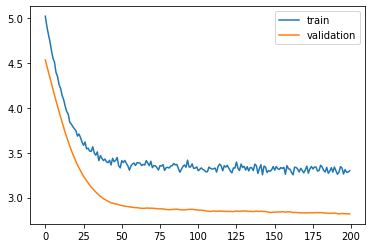

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

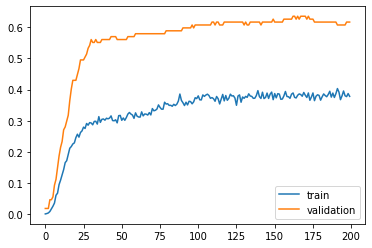

In [12]:
# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='validation')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [13]:
test_predictions = np.argmax(model.predict(X_test), axis=1)
accuracy = (test_predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.5105263157894737


In [14]:
from sklearn.metrics import confusion_matrix
print("Y train")
print("Unique train labels:", np.unique(y_train.values))
print("Away win count:", (y_train==0).sum())
print("Draw count:", (y_train==1).sum())
print("Away win count:", (y_train==2).sum())

Y train
Unique train labels: [0 1 2]
Away win count: 757
Draw count: 686
Away win count: 1217


In [15]:
print("Train Prediction")
train_predictions = np.argmax(model.predict(X_train), axis=1)
print("Unique train labels:", np.unique(train_predictions))
print("Away win count:", (y_train==0).sum())
print("Draw count:", (y_train==1).sum())
print("Home win count:", (y_train==2).sum())

Train Prediction
Unique train labels: [0 2]
Away win count: 757
Draw count: 686
Home win count: 1217


In [16]:
# Train
df_conf_matrix = pd.DataFrame(confusion_matrix(y_train, train_predictions, labels=[0, 1, 2]), 
             index=['true home', 'true draw', 'true away'], columns=['pred home', 'pred draw', 'pred away'])
print("Train Data")
df_conf_matrix

Train Data


,pred home,pred draw,pred away
true home,346,0,411
true draw,238,0,448
true away,211,0,1006


In [17]:
# Test
df_conf_matrix = pd.DataFrame(confusion_matrix(y_test, test_predictions, labels=[0, 1, 2]), 
             index=['true home', 'true draw', 'true away'], columns=['pred home', 'pred draw', 'pred away'])
print("Test Data")
df_conf_matrix

Test Data


,pred home,pred draw,pred away
true home,56,0,54
true draw,26,0,71
true away,35,0,138
